In [32]:
import numpy as np
import shapely
import astropy 
import h5py
import scipy
from scipy import stats
import scipy.optimize as opt
from scipy.stats import chisquare
from astropy.io import fits
from astrodendro import Dendrogram, pp_catalog
from astropy import units as u
from astropy.wcs import WCS
from astrodendro.analysis import PPStatistic
from matplotlib import pyplot as plt
import aplpy
from astropy.modeling import models,fitting
import astropy.wcs as wcs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import statsmodels.api as sm
import matplotlib.patches as mpatche


In [2]:
d1 = Dendrogram.load_from('/home/student04/Newrepos/NGC1333_dendrogram.fits')
d2 = Dendrogram.load_from('/home/student04/Newrepos/B1_dendrogram.fits')
d3 = Dendrogram.load_from('/home/student04/Newrepos/L1455_dendrogram.fits')
d4 = Dendrogram.load_from('/home/student04/Newrepos/moment0_Dendrograms/L1451_dendrogram.fits')
d5 = Dendrogram.load_from('/home/student04/Newrepos/moment0_Dendrograms/IC348_dendrogram.fits')

In [3]:
spatial_axis = (0.0024440485689343*u.deg).to(u.arcsec)
bmaj = (0.008554169991270138*u.deg).to(u.arcsec)
bmin = (0.008554169991270138*u.deg).to(u.arcsec)
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= spatial_axis
metadata['beam_major']= bmaj
metadata['beam_minor']= bmin

In [4]:
cat1 = pp_catalog(d1,metadata)
cat2 = pp_catalog(d2,metadata)
cat3 = pp_catalog(d3,metadata)
cat4 = pp_catalog(d4,metadata)
cat5 = pp_catalog(d5,metadata)

Computing catalog for 72 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%


[========>                                ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[===========>                             ] 27%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 36%
[==============>                          ] 37%
[===============>                         ] 38%
[================>                        ] 40%
[================>                        ] 41%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 47%
[===================>                     ] 48%
[===================>                  


[=======================>                 ] 58%
[========================>                ] 61%
[=========================>               ] 63%
[==========================>              ] 66%
[===========================>             ] 69%
[============================>            ] 72%
[=============================>           ] 74%
[===============================>         ] 77%
[================================>        ] 80%
[=================================>       ] 83%
[==================================>      ] 86%
[===================================>     ] 88%
[====================================>    ] 91%
[=====================================>   ] 94%
[======================================>  ] 97%
[=======================================> ] 99%
[========================================>] 100%
Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>                                    ] 12%
[==


[==============================>          ] 76%
[================================>        ] 80%
[=================================>       ] 84%
[===================================>     ] 88%
[====================================>    ] 92%
[======================================>  ] 96%
[========================================>] 100%
[========================================>] 100%
Computing catalog for 8 structures

[=====>                                   ] 12%
[==========>                              ] 25%
[===============>                         ] 37%
[====================>                    ] 50%
[=========================>               ] 62%
[==============================>          ] 75%
[===================================>     ] 87%
[========================================>] 100%
[========================================>] 100%
Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>      


[==============>                          ] 36%
[================>                        ] 40%
[=================>                       ] 44%
[===================>                     ] 48%
[====================>                    ] 52%
[======================>                  ] 56%
[========================>                ] 60%
[=========================>               ] 64%
[===========================>             ] 68%
[============================>            ] 72%
[==============================>          ] 76%
[================================>        ] 80%
[=================================>       ] 84%
[===================================>     ] 88%
[====================================>    ] 92%
[======================================>  ] 96%
[========================================>] 100%
[========================================>] 100%


In [6]:
''''In astrodendro, position angle is given by the angle counterclockwise from the +x axis. This
is the exact same opposite to how the velocity gradient direction is defined. Hence, we must flip
the position angle about the y-axis to make sure the two quantities are definied the same way.'''
def position_angle(d):
    x = len(d)
    angle = []
    for i in range(x):
        if d[i].is_leaf:
            s = d[i]
            stat = PPStatistic(s,metadata=metadata)
            a = stat.position_angle/(1*u.deg)
            if a>=0:
                angle.append(180-a)
            else:
                angle.append(-180-a)
    position_angle_leaf = np.array(angle)
    return position_angle_leaf

In [8]:
position_angle_d1 = np.delete(position_angle(d1),-1)
position_angle_d2 = position_angle(d2)
position_angle_d3 = position_angle(d3)
position_angle_d4 = position_angle(d4)
position_angle_d5 = position_angle(d5)

In [9]:
V_d1 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/NGC1333_NH3_Vlsr_all_rebase3_masked.fits')
V_d2 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/B1_NH3_Vlsr_all_rebase3_masked.fits')
V_d3 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/L1455_NH3_Vlsr_all_rebase3_masked.fits')
V_d4 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/L1451_NH3_Vlsr_all_rebase3_masked.fits')
V_d5 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/IC348_NH3_Vlsr_all_rebase3_masked.fits')

In [10]:
data1 = V_d1[0].data
w1 = WCS(V_d1[0])
index1=[]
for i in range(72):
    if d1[i].is_leaf:
        index1.append(i)
index1 = np.array(index1)
index1 = np.delete(index1,-1) #rejects the 71th core
data2 = V_d2[0].data
w2 = WCS(V_d2[0])
index2=[]
for i in range(36):
    if d2[i].is_leaf:
        index2.append(i)
index2 = np.array(index2)
data3 = V_d3[0].data
w3 = WCS(V_d3[0])
index3=[]
for i in range(25):
    if d3[i].is_leaf:
        index3.append(i)
index3 = np.array(index3)
data4 = V_d4[0].data
w4 = WCS(V_d4[0])
index4=[]
for i in range(8):
    if d4[i].is_leaf:
        index4.append(i)
index4 = np.array(index4)
data5 = V_d5[0].data
w5 = WCS(V_d5[0])
index5=[]
for i in range(25):
    if d5[i].is_leaf:
        index5.append(i)
index5 = np.array(index5)

In [11]:
error1 = fits.open('/home/student04/Downloads/parameter_maps/eVlsr/NGC1333_NH3_eVlsr_all_rebase3_masked.fits')
error2 = fits.open('/home/student04/Downloads/parameter_maps/eVlsr/B1_NH3_eVlsr_all_rebase3_masked.fits')
error3 = fits.open('/home/student04/Downloads/parameter_maps/eVlsr/L1455_NH3_eVlsr_all_rebase3_masked.fits')
error4 = fits.open('/home/student04/Downloads/parameter_maps/eVlsr/L1451_NH3_eVlsr_all_rebase3_masked.fits')
error5 = fits.open('/home/student04/Downloads/parameter_maps/eVlsr/IC348_NH3_eVlsr_all_rebase3_masked.fits')
error1 = error1[0].data
error2 = error2[0].data
error3 = error3[0].data
error4 = error4[0].data
error5 = error5[0].data

In [12]:
def velocity_gradient(d,index,data,w,error,dist):
    grad_orientation = []
    slope_X=[]
    slope_Y=[]
    for i in index:
        structure = d[i]
        mask = structure.get_mask()
        y,x = structure.indices()
        v = data[y,x]*u.km/u.s
        wx,wy = w.wcs_pix2world(x,y,1)
        model = models.Planar2D()
        fitter = fitting.LevMarLSQFitter()
        best_fit = fitter(model,wx,wy,v)
        slope_x = (best_fit.slope_x.value)
        slope_y = (best_fit.slope_y.value)
        slope_x = slope_x/(dist*((1*u.deg).to(u.rad)/(1*u.rad)))
        slope_y = slope_y/(dist*((1*u.deg).to(u.rad)/(1*u.rad)))
        orientation = ((np.arctan(slope_y/slope_x)).to(u.deg))/(1*u.deg)
        slope_X.append(slope_x)
        slope_Y.append(slope_y)
        if orientation>0:
            if slope_x<0 and slope_y<0:
                grad_orientation.append(orientation+180)
            else:
                grad_orientation.append(orientation)
        if orientation<0:
            if slope_x>0 and slope_y<0:
                grad_orientation.append(orientation)      
            else:
                grad_orientation.append(orientation+180)
    grad_orientation = np.array(grad_orientation)
    return grad_orientation,np.array(slope_X),np.array(slope_Y)

In [13]:
dist1 = 293
dist2 = 301
dist3 = 288
dist4 = 279
dist5 = 320

orientation1,slope_x1,slope_y1 = velocity_gradient(d1,index1,data1,w1,error1,dist2)
orientation2,slope_x2,slope_y2 = velocity_gradient(d2,index2,data2,w2,error2,dist2)
orientation3,slope_x3,slope_y3= velocity_gradient(d3,index3,data3,w3,error3,dist3)
orientation4,slope_x4,slope_y4 = velocity_gradient(d4,index4,data4,w4,error4,dist4)
orientation5,slope_x5,slope_y5 = velocity_gradient(d5,index5,data5,w5,error5,dist5)


In [22]:
def draw_arrow(dx,dy):
    magnitude = np.sqrt(dx**2+dy**2)
    dx_new = dx*np.sqrt(0.002**2/magnitude**2)
    dy_new = dy*np.sqrt(0.002**2/magnitude**2)
    return dx_new,dy_new

In [45]:
def gradient_plot(d,index,data,w,orientation,position_angle,slope_X,slope_Y,name):
    new_p = []
    new_o = []  
    for k in index:
        structure = d[k]
        q = np.argwhere(index==k)[0][0]
        mask = structure.get_mask()
        y,x = structure.indices()
        vel = data[y,x]
        wx,wy = w.wcs_pix2world(x,y,1)
        model = models.Planar2D()
        fitter = fitting.LevMarLSQFitter()
        best_fit = fitter(model,wx,wy,vel)
        slope_x = (best_fit.slope_x.value)
        slope_y = (best_fit.slope_y.value)
        v0 = (best_fit.intercept.value)
        xmin = np.min(wx)
        xmax = np.max(wx)
        ymin = np.min(wy)
        ymax = np.max(wy)
        zero_index = np.argwhere(vel==0)
        vel = np.delete(vel,zero_index)
        vmin = np.min(vel)
        vmax = np.max(vel)
        sy,sx = data.shape
        a = np.linspace(0,sx-1,sx)
        b = np.linspace(0,sy-1,sy)
        wxx,null = w.wcs_pix2world(a,1,1)
        null,wyy = w.wcs_pix2world(1,b,1)
        velocity = np.zeros_like(data)
        for i in range(sx):
            for j in range(sy):
                v = wxx[(i)]*slope_x + wyy[(j)]*slope_y + v0
                velocity[(j,i)]=v
        levels_data = np.linspace(vmin-0.1,vmax+0.1,70)
        masked_v = np.ma.masked_where(mask==False,velocity)
        masked_data = np.ma.masked_where(mask==False,data)
        plt.figure(figsize=(10,6))
        plt.contourf(wxx,wyy,masked_data,levels=levels_data,cmap='twilight',alpha=1)
        plt.xlim(xmin-0.005,xmax+0.005)
        plt.ylim(ymin-0.005,ymax+0.005)
        plt.xlabel("RA(deg)")
        plt.ylabel("DEC(deg)")
        plt.colorbar(label='Vlsr')
        plt.title("Velocity Gradient For Core No." + str(k)+' in '+name)
        plt.contour(wxx,wyy,mask,levels=True,colors='yellow',alpha=1.0)
        p_angle = position_angle[q]
        o_angle = orientation[q]
        diff = np.absolute(p_angle-o_angle)
        if diff<=90:
            p_angle = p_angle
        else:
            p_angle=p_angle+180
        y_over_x = np.tan((p_angle)*u.deg)
        if y_over_x<0:
            if 90<p_angle<180:
                dx= -1
                dy = -y_over_x
            else:
                dx = 1
                dy = y_over_x
        if y_over_x>0:
            if 0<p_angle<90:
                dx = 1
                dy = y_over_x
            else:
                dx = -1
                dy = -y_over_x
        dx_p,dy_p=draw_arrow(dx,dy)
        dx_g,dy_g=draw_arrow(slope_X[q],slope_Y[q])
        new_p.append(p_angle)
        new_o.append(o_angle)
        plt.arrow(xmin-0.0004,ymax+0.0004,dx_p,dy_p,width=0.00005,edgecolor='red',facecolor='red',head_width = 0.00055,head_length=0.0005)
        plt.arrow(xmin-0.0004,ymax+0.0004,dx_g,dy_g,width=0.00005,edgecolor='blue',facecolor='blue',head_width = 0.00055,head_length=0.0005)
        red_patch = mpatche.Patch(color='red', label='core orientation: '+ str(round(p_angle,2))+'°')
        blue_patch = mpatche.Patch(color='blue', label='gradient position angle: '+ str(round(o_angle,2))+'°')
        plt.legend(handles=[red_patch,blue_patch])
        #print('gradient:',o_angle)
        #print('position:',p_angle)
        plt.show()


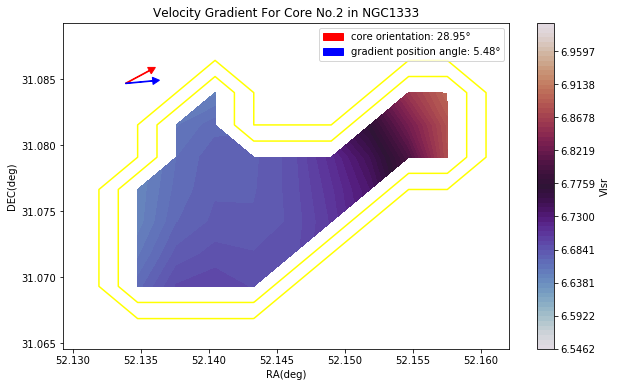

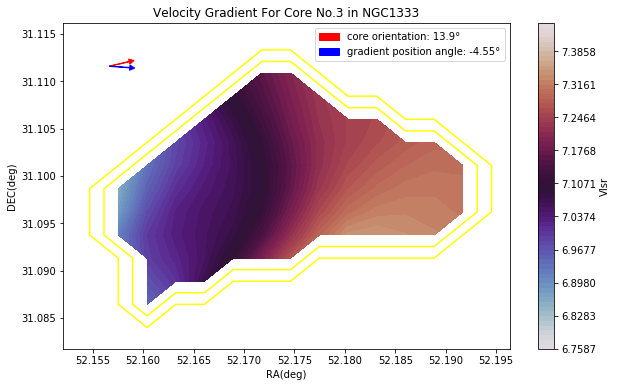

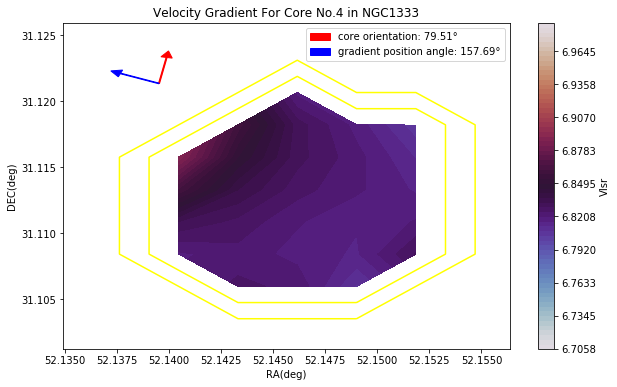

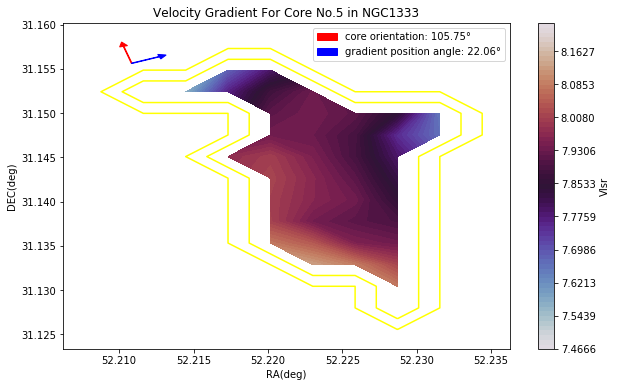

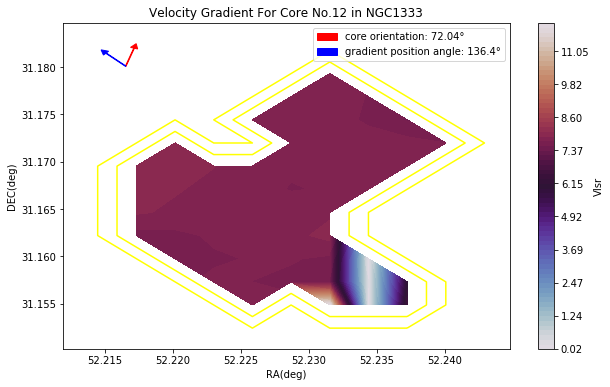

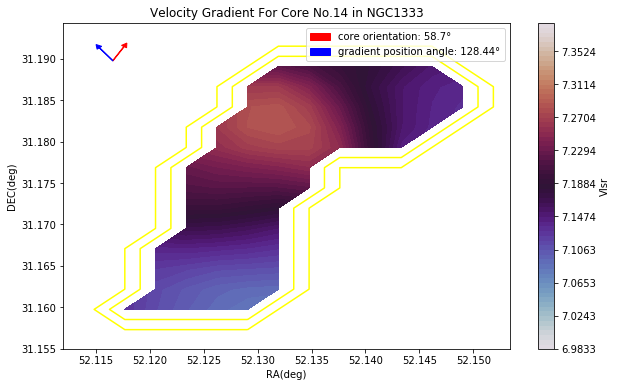

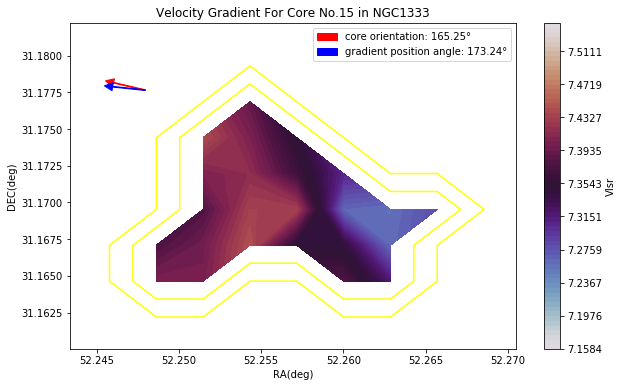

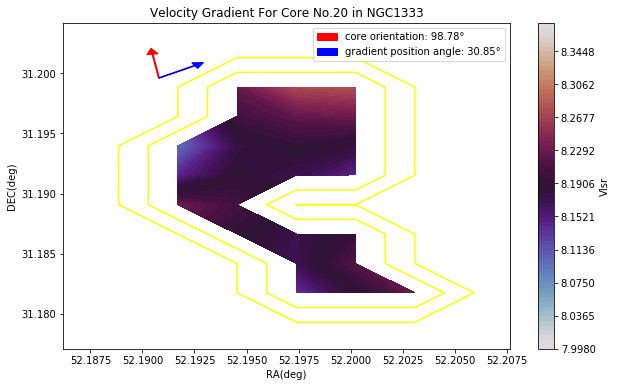

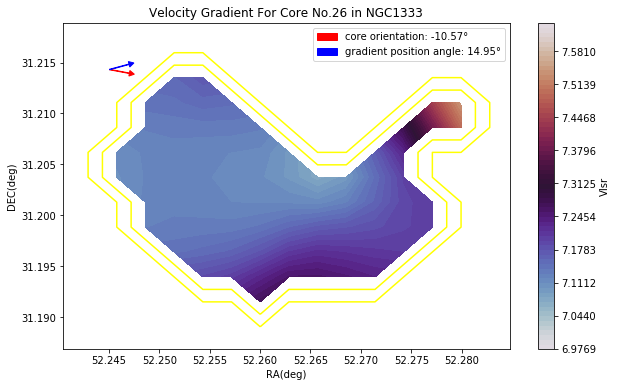

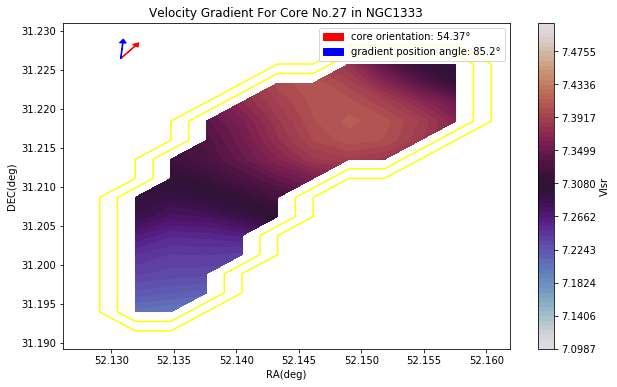

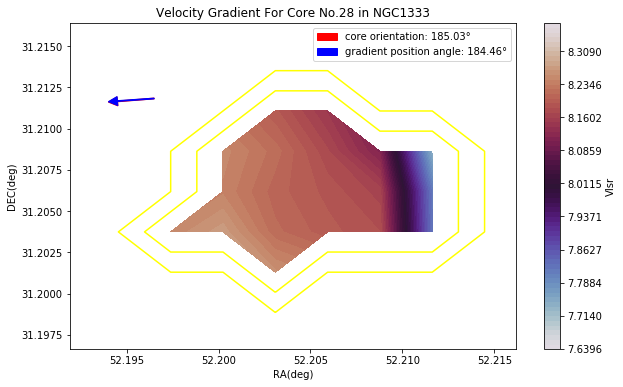

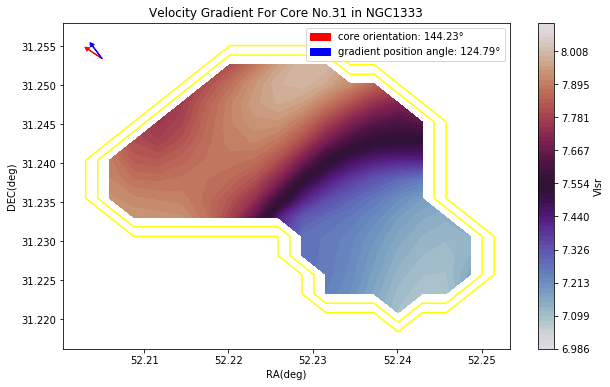

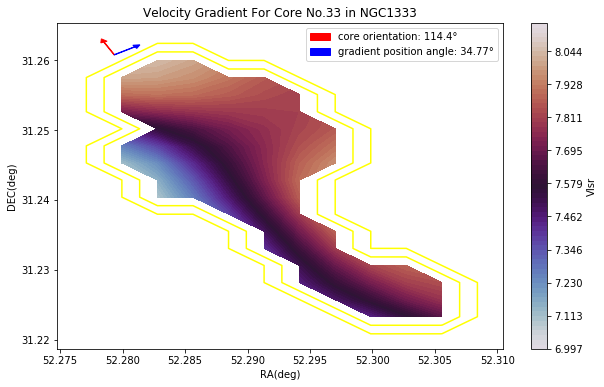

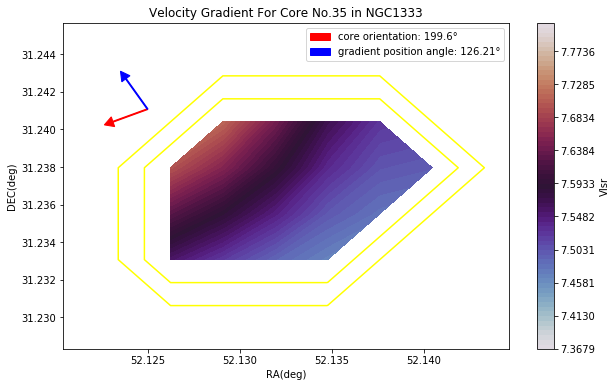

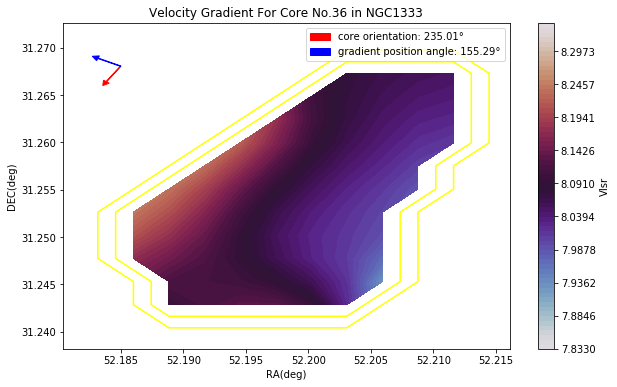

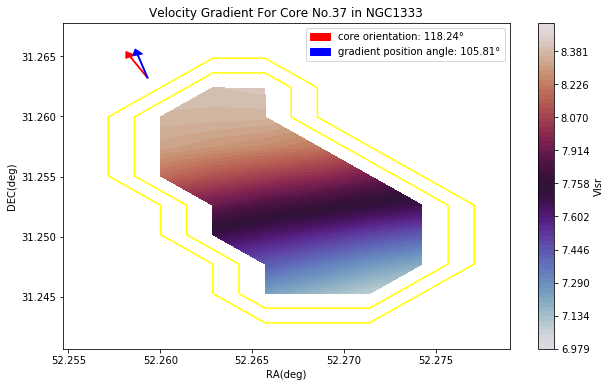

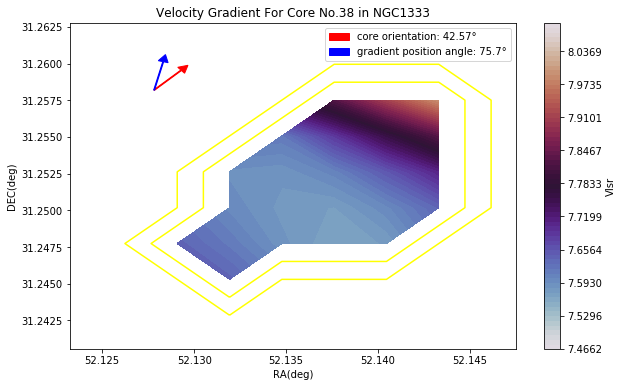

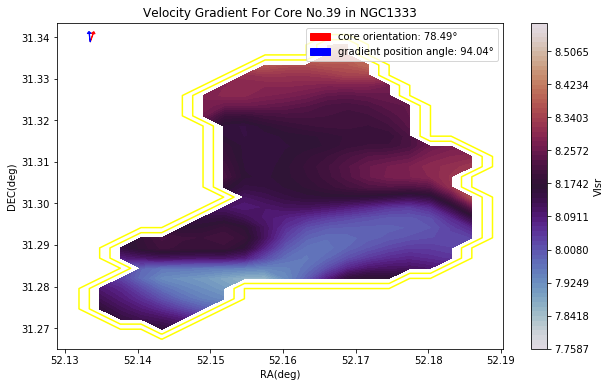

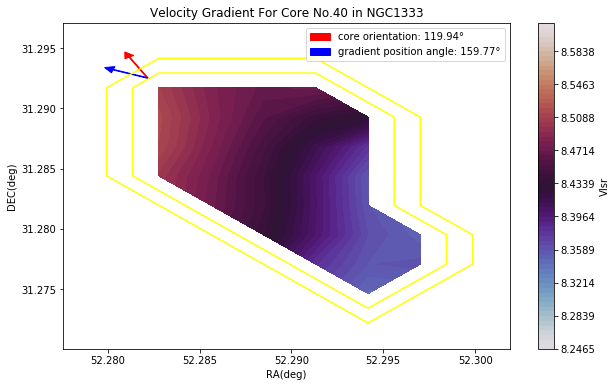

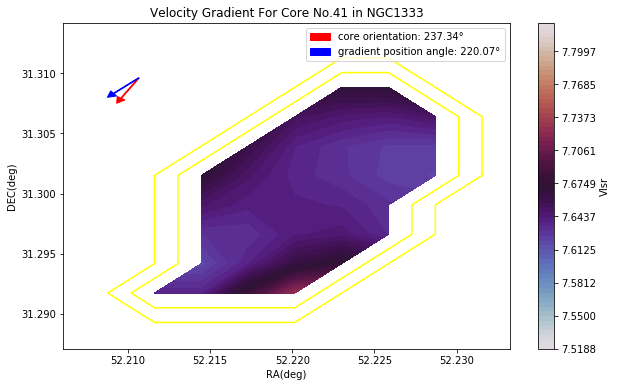

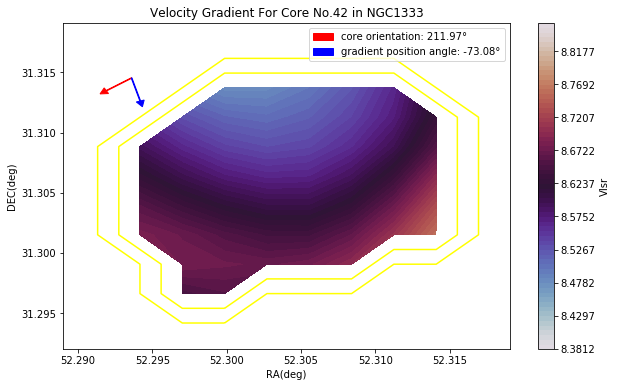

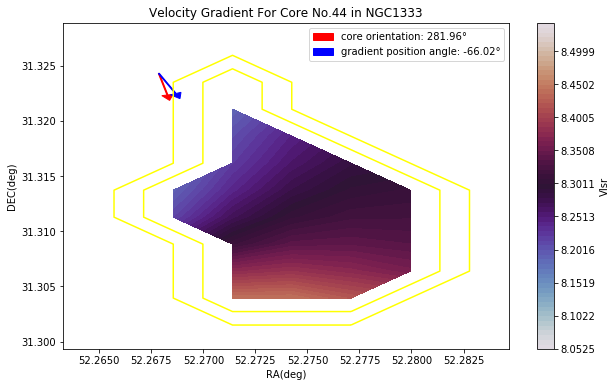

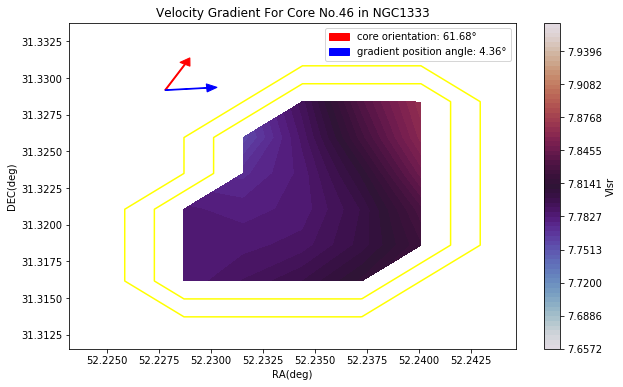

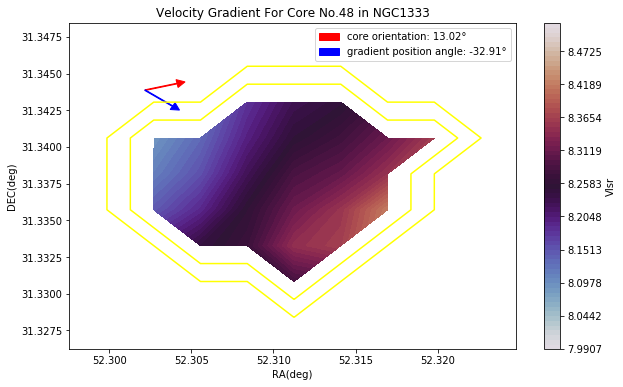

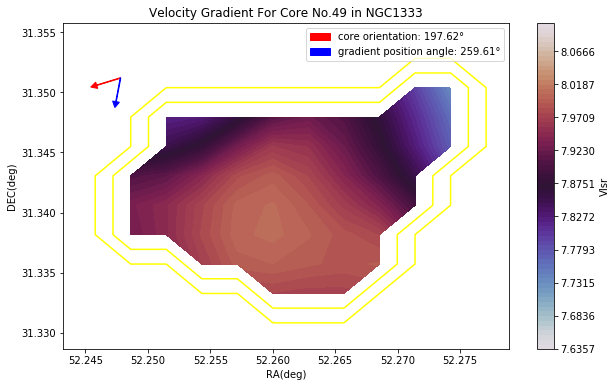

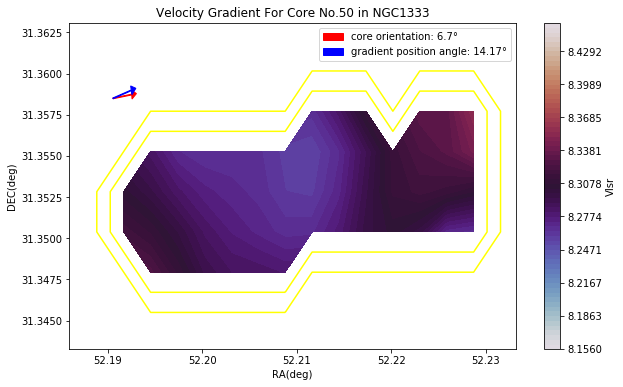

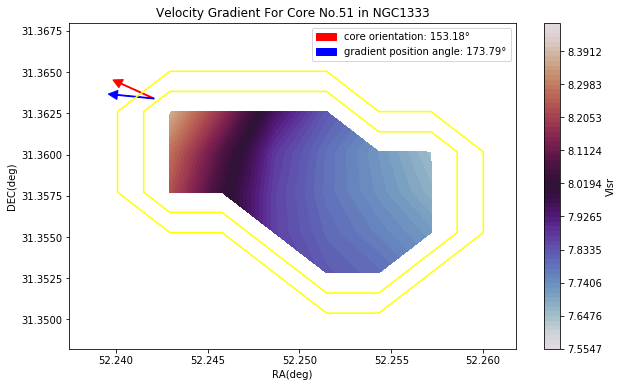

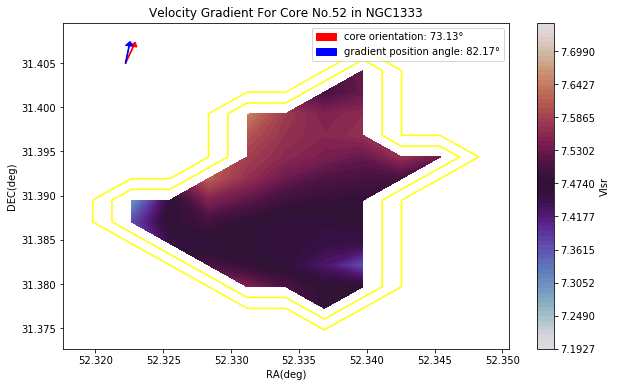

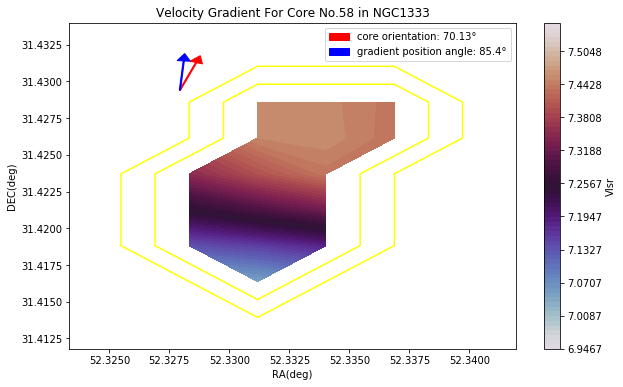

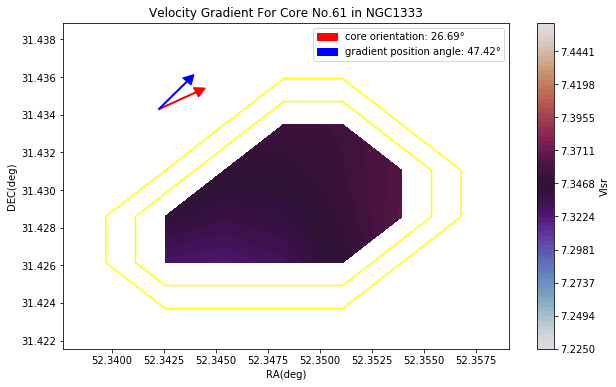

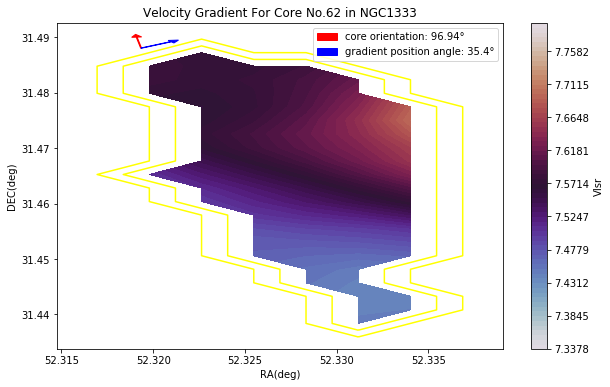

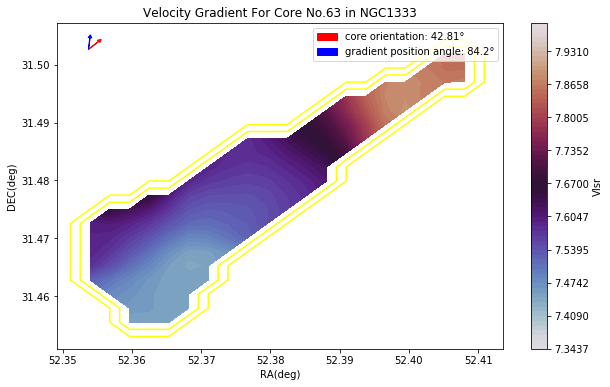

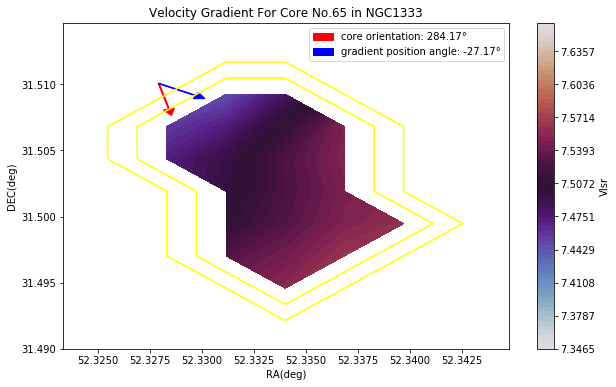

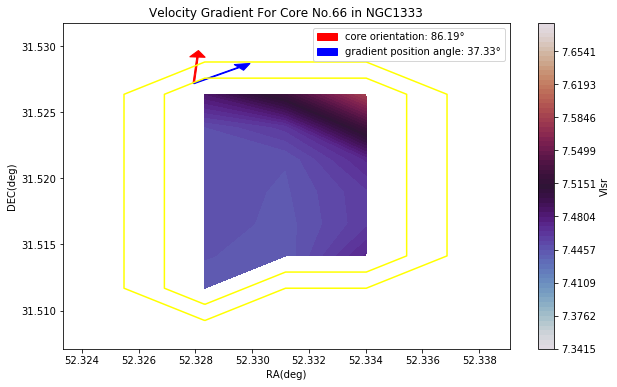

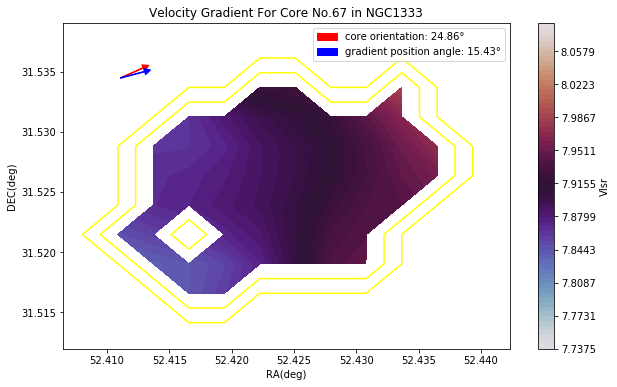

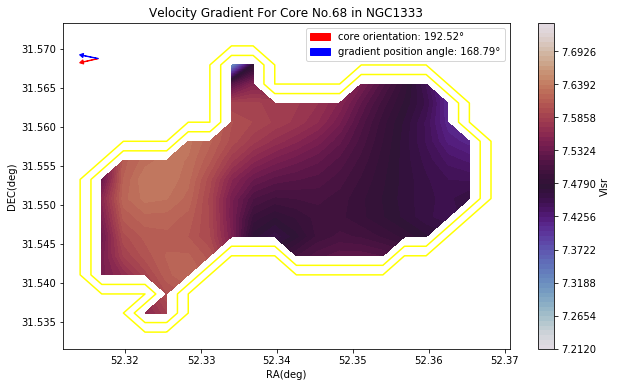

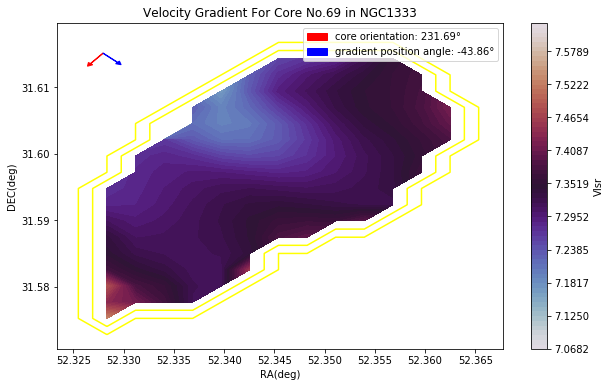

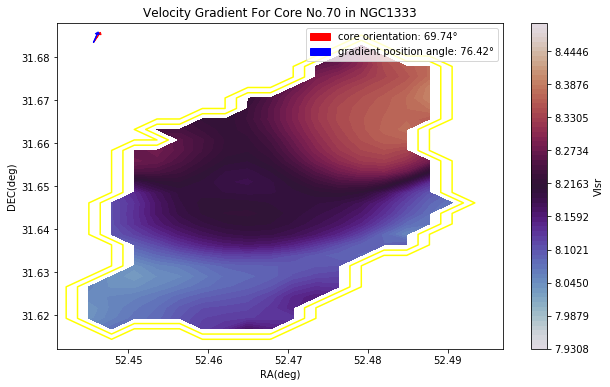

In [46]:
gradient_plot(d1,index1,data1,w1,orientation1,position_angle_d1,slope_x1,slope_y1,'NGC1333')


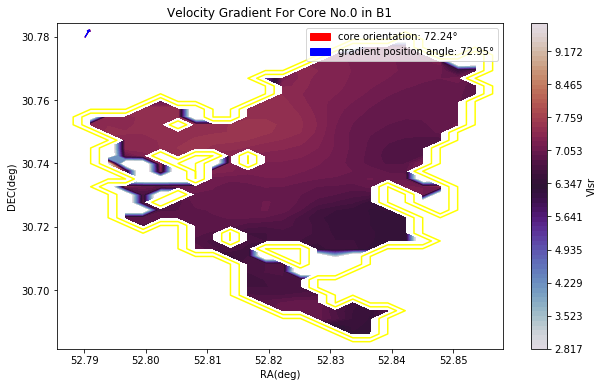

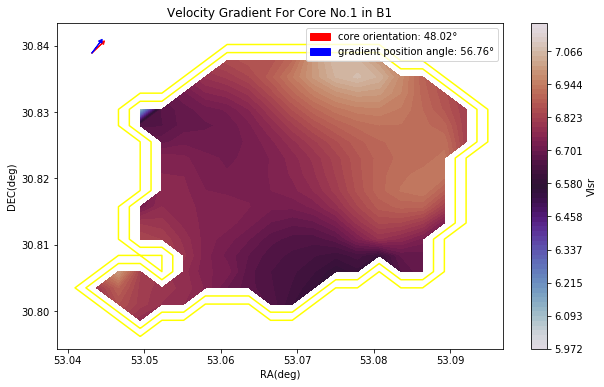

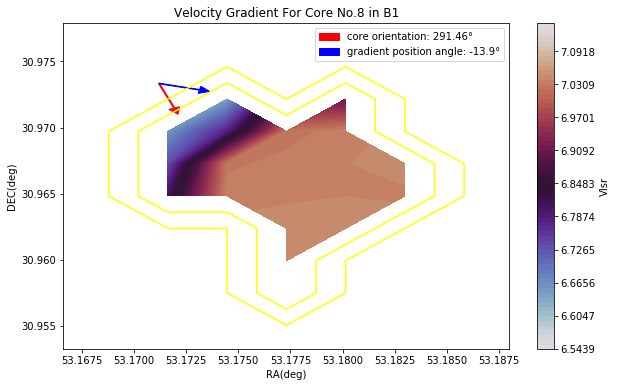

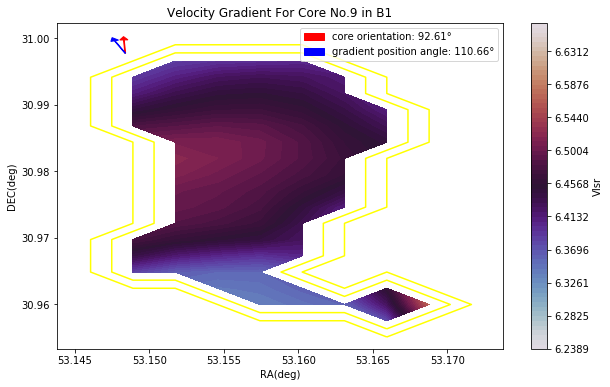

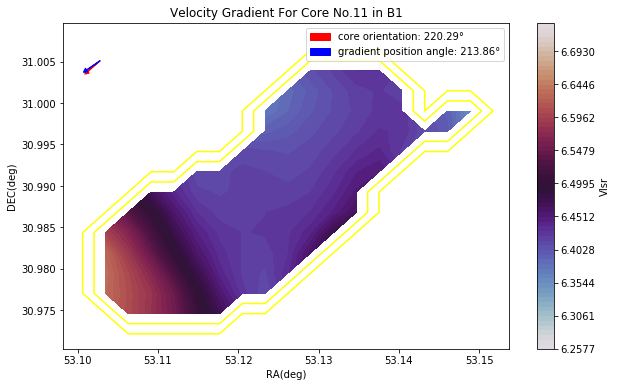

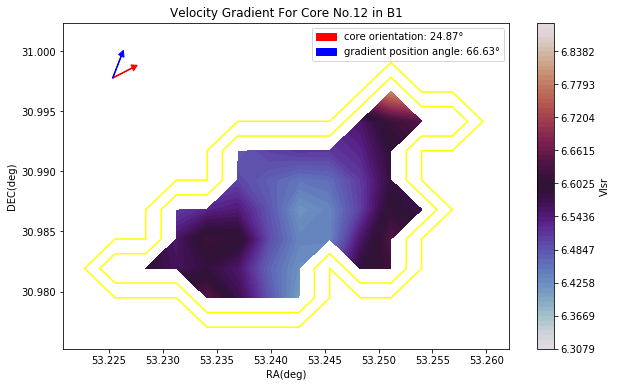

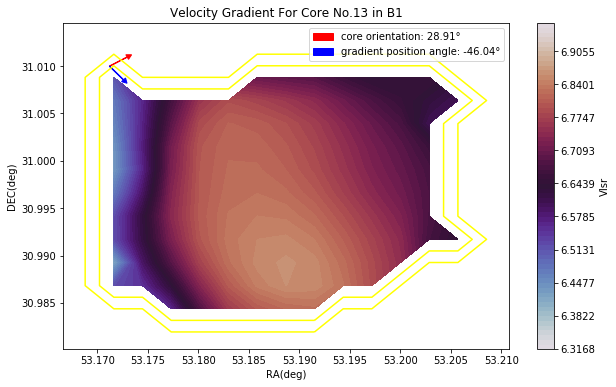

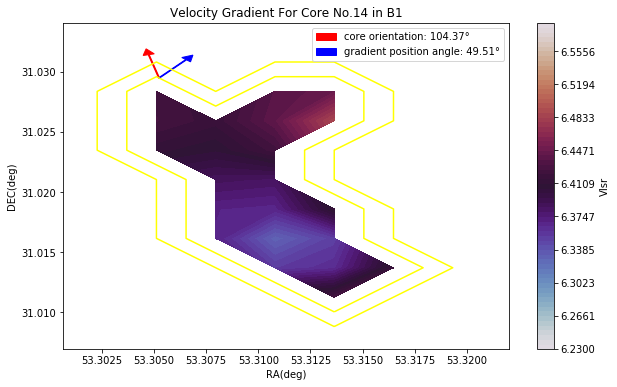

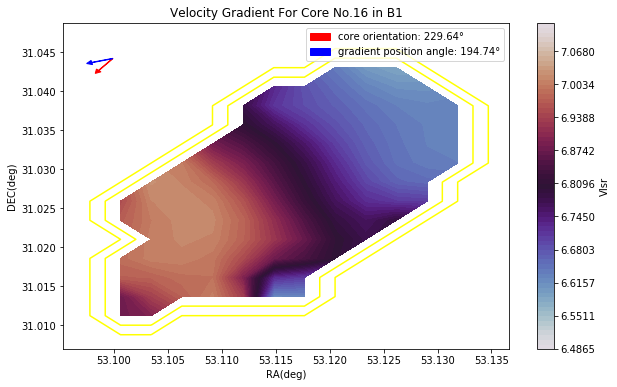

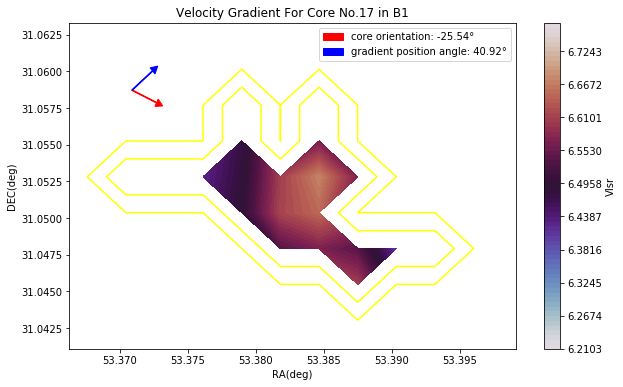

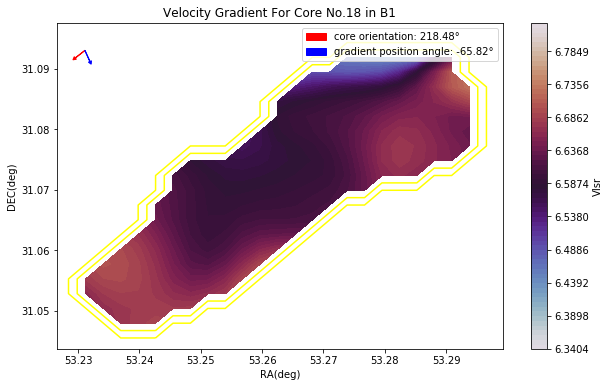

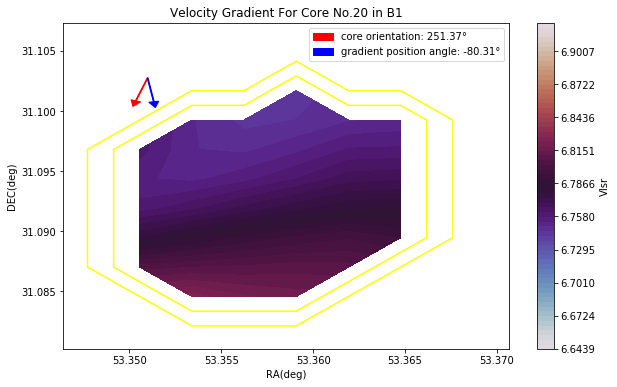

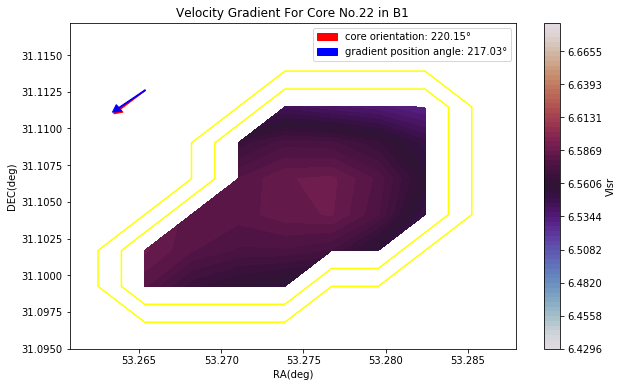

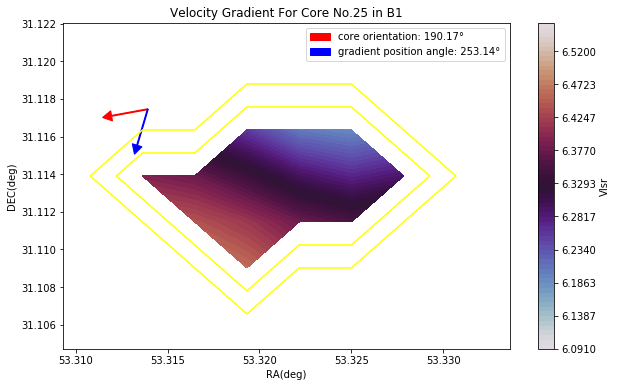

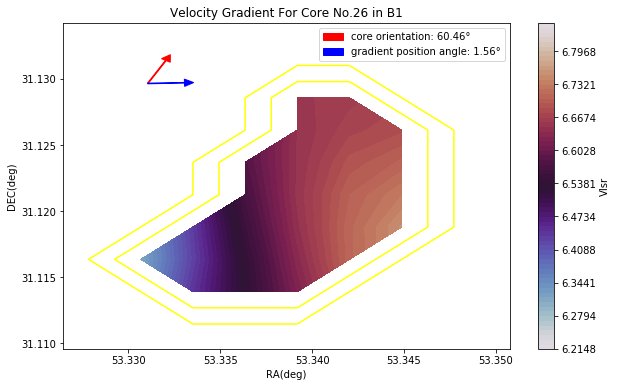

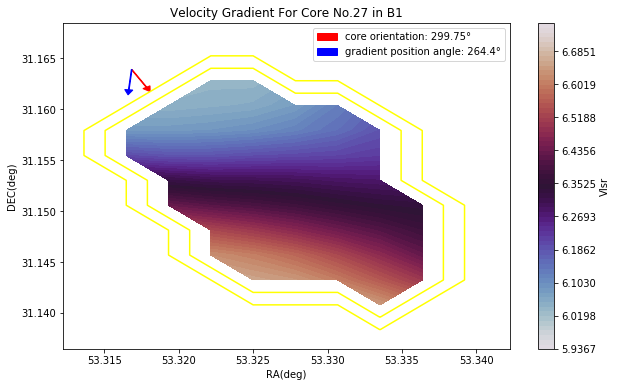

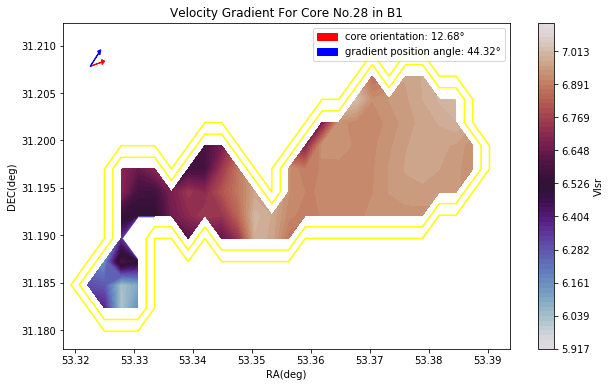

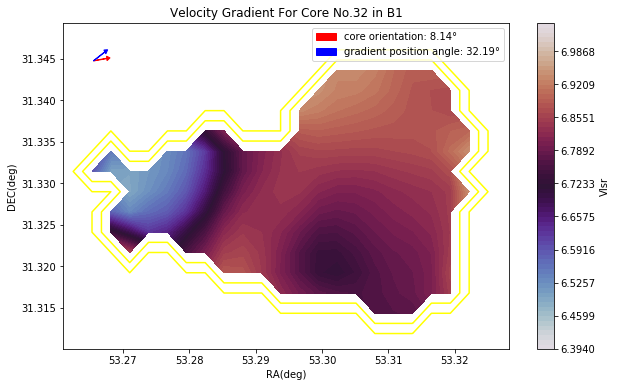

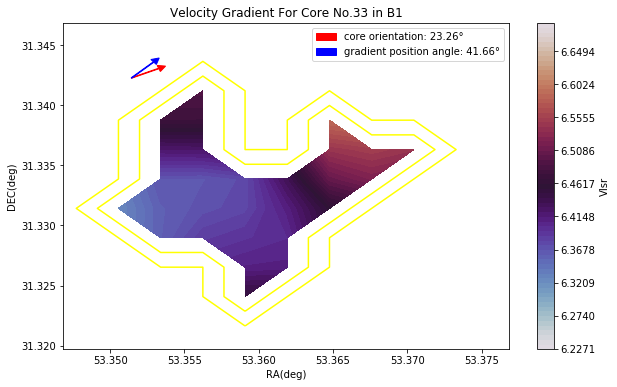

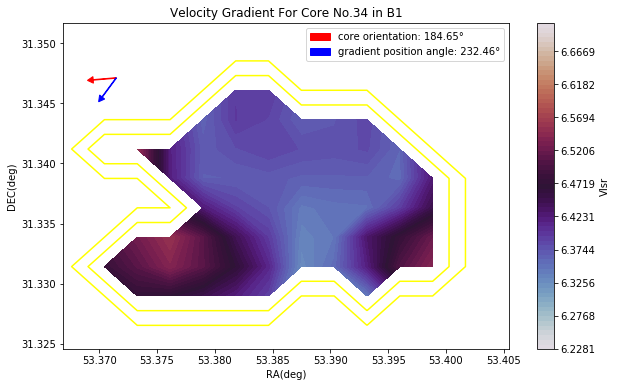

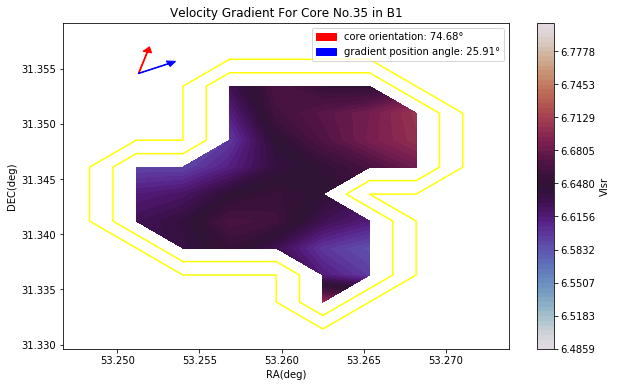

In [47]:
gradient_plot(d2,index2,data2,w2,orientation2,position_angle_d2,slope_x2,slope_y2,'B1')

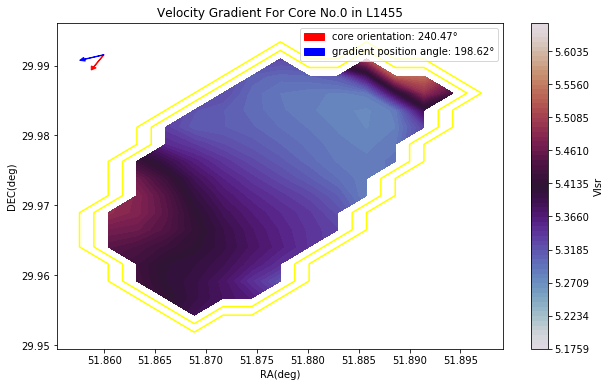

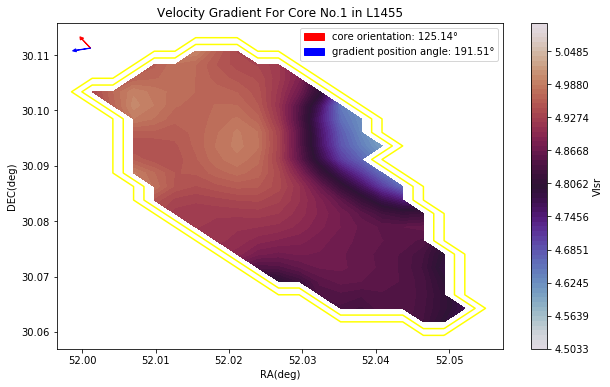

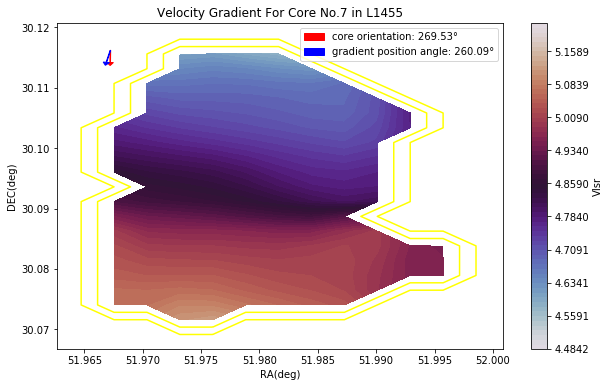

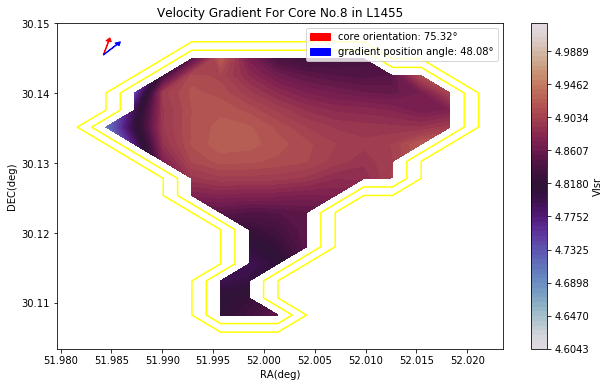

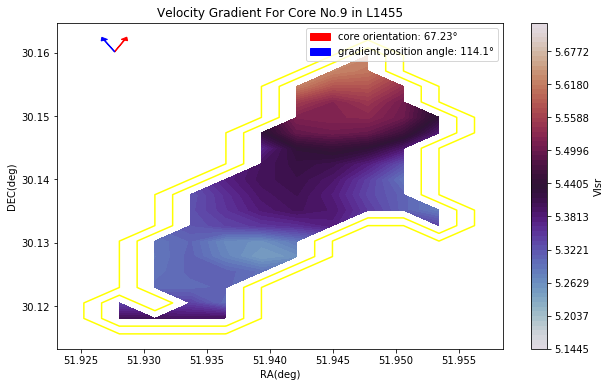

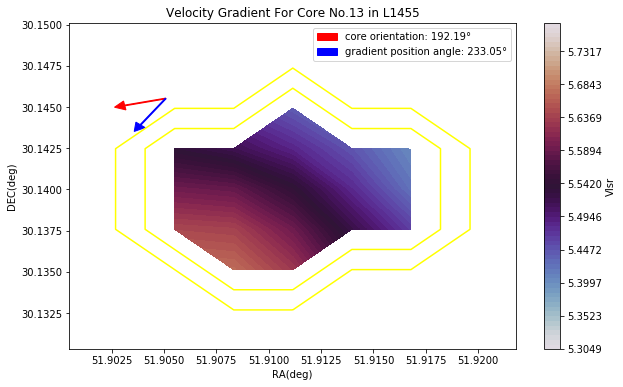

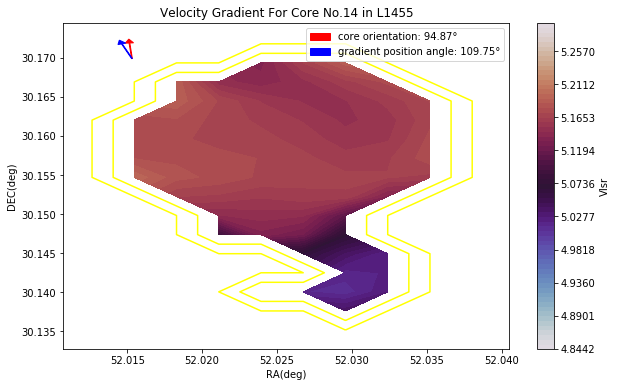

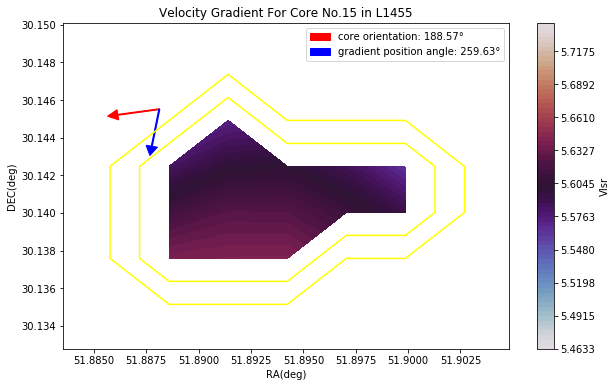

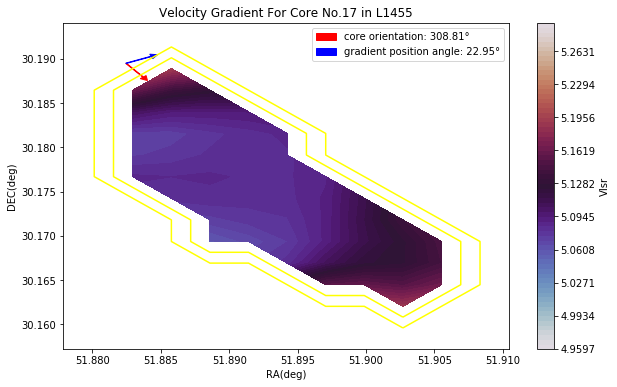

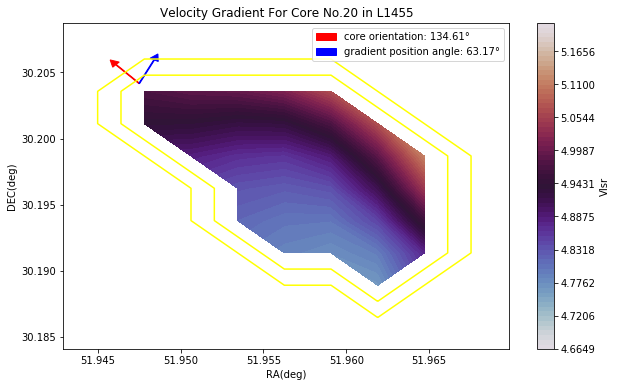

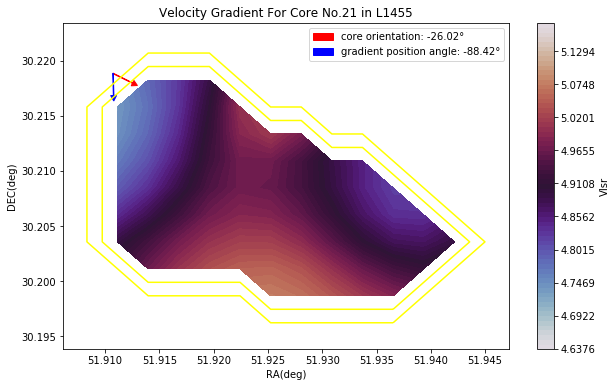

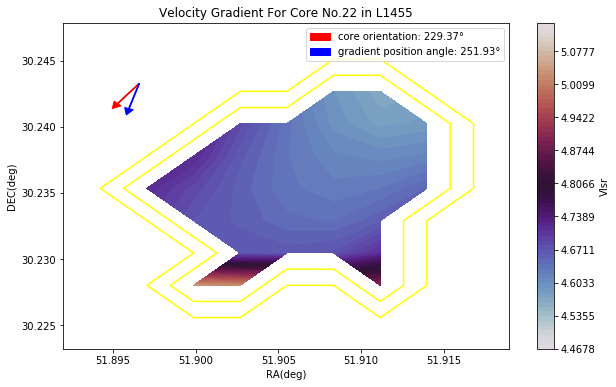

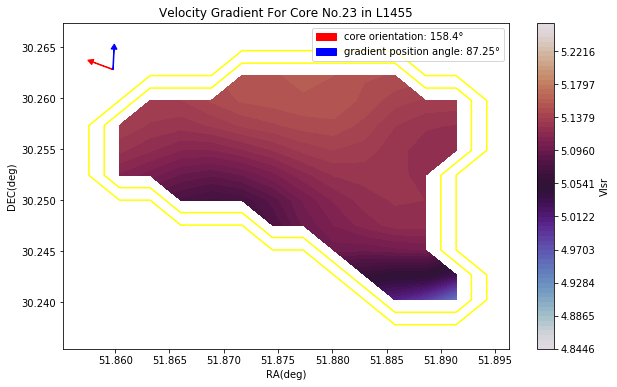

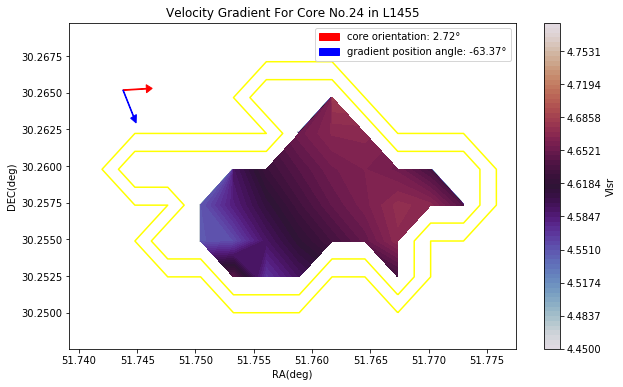

In [49]:
gradient_plot(d3,index3,data3,w3,orientation3,position_angle_d3,slope_x3,slope_y3,'L1455')

    

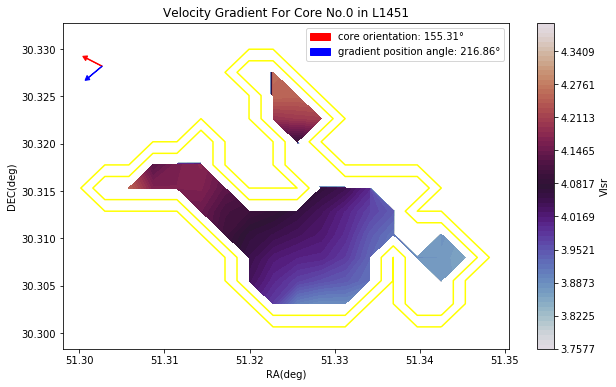

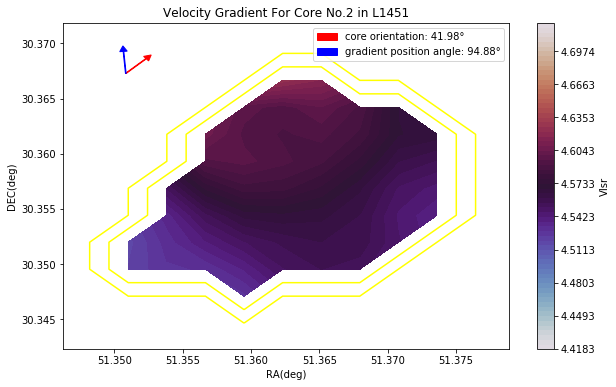

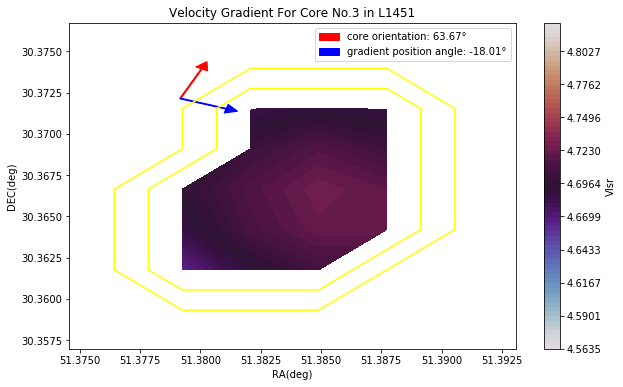

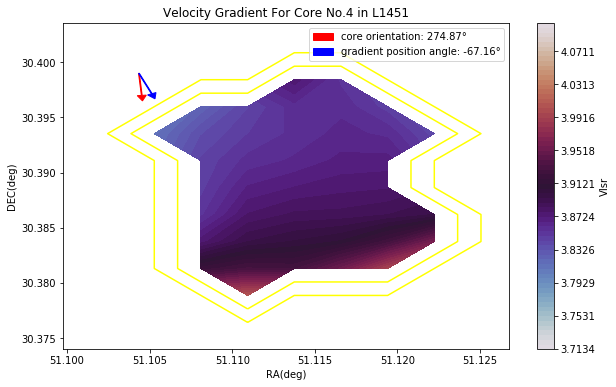

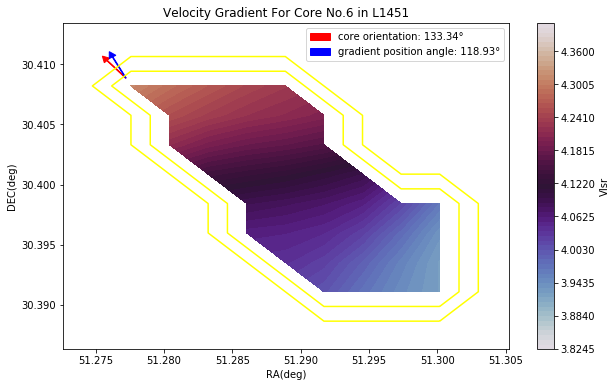

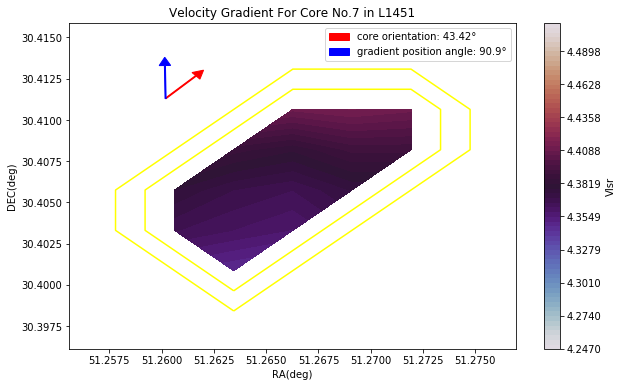

In [50]:
gradient_plot(d4,index4,data4,w4,orientation4,position_angle_d4,slope_x4,slope_y4,'L1451')


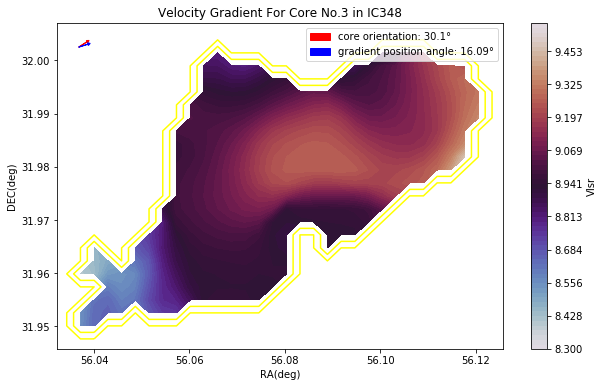

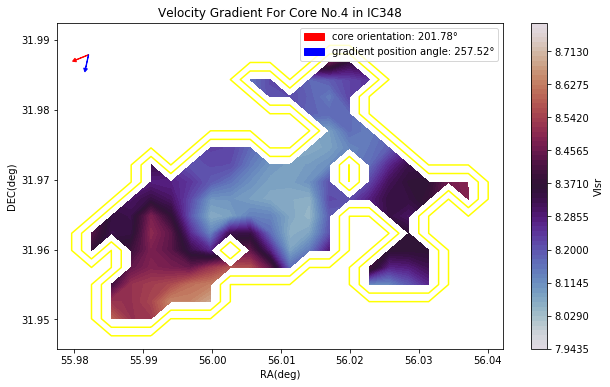

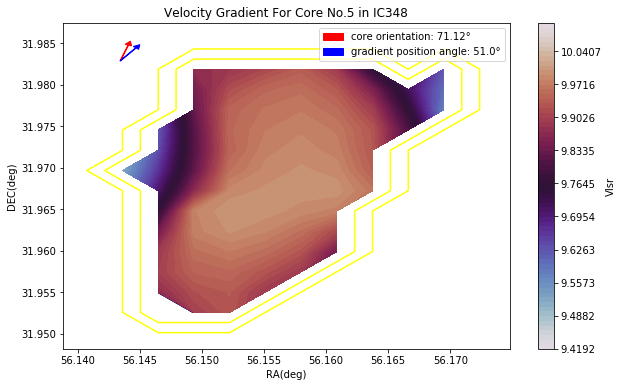

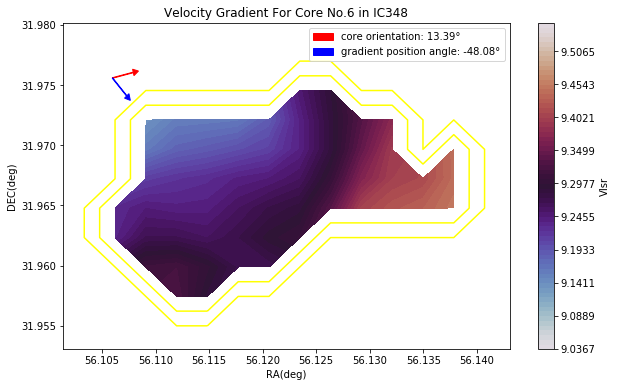

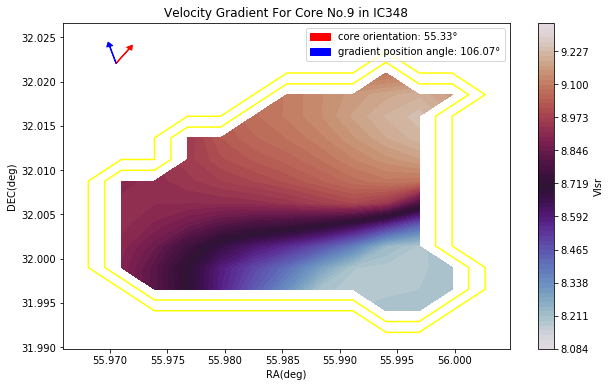

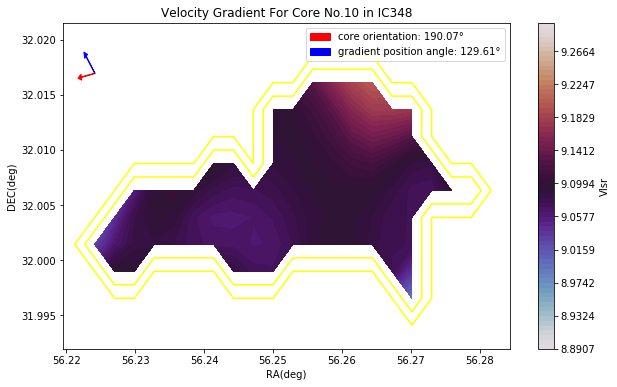

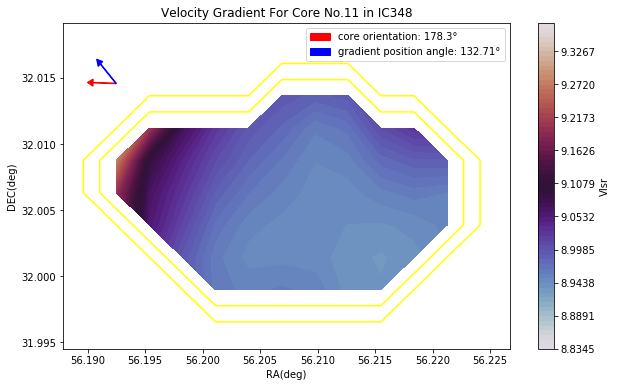

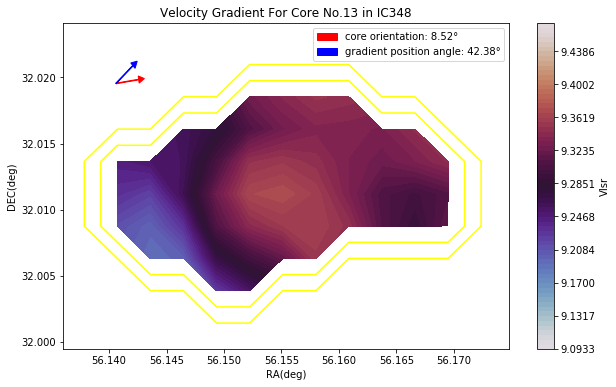

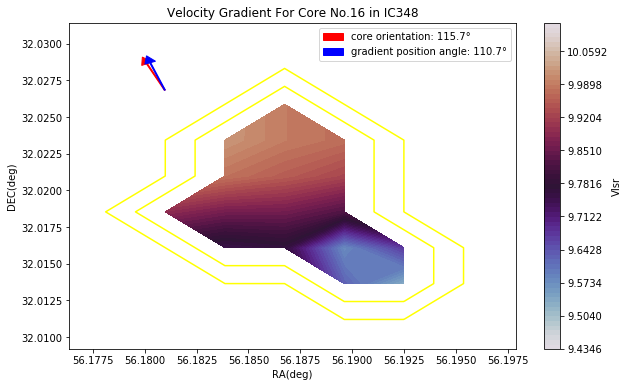

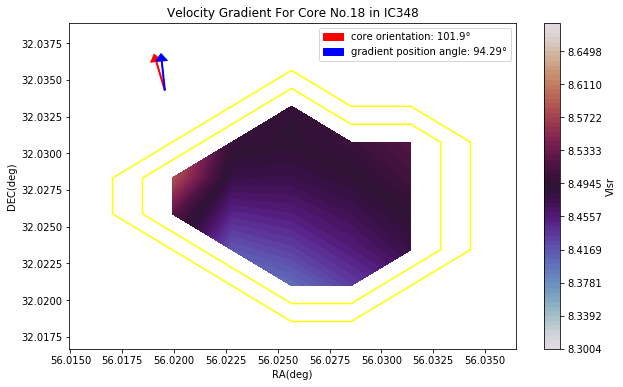

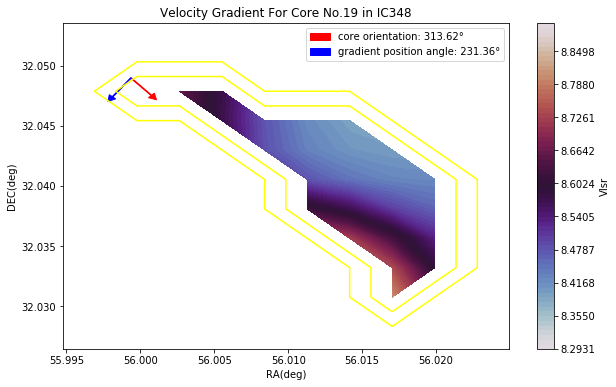

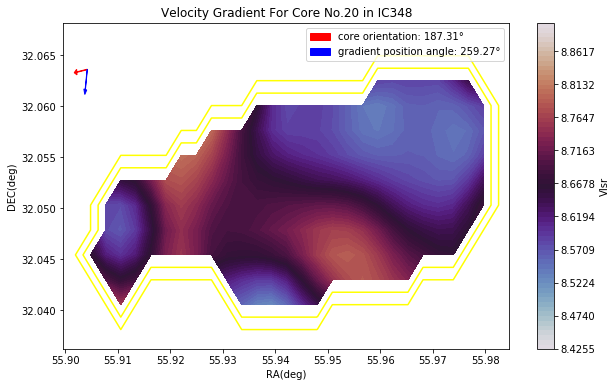

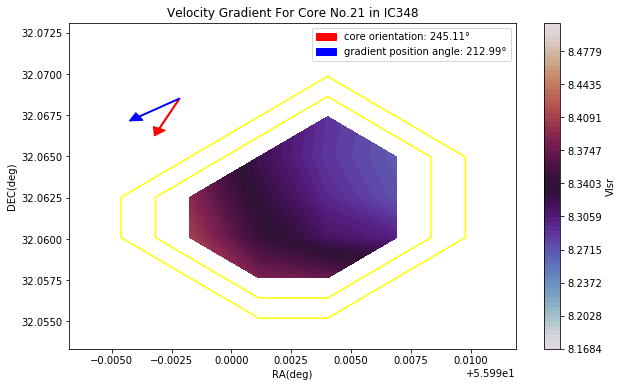

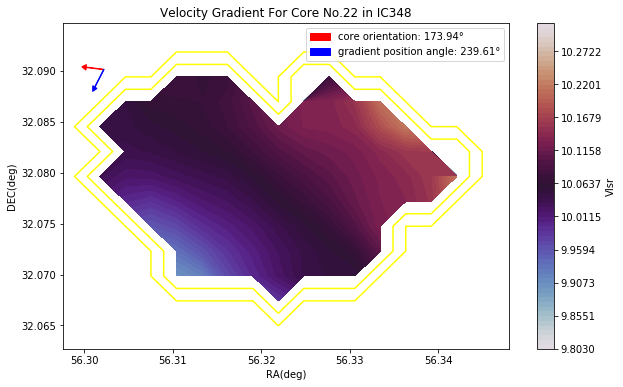

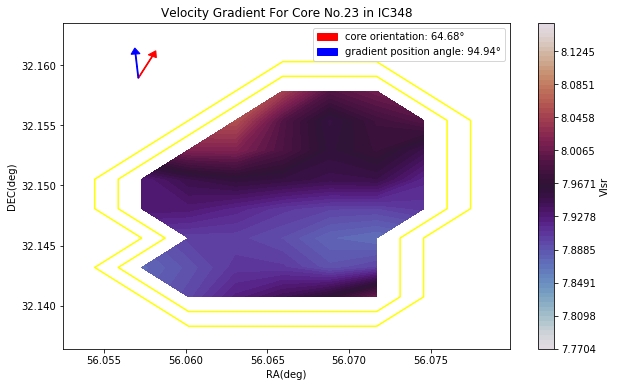

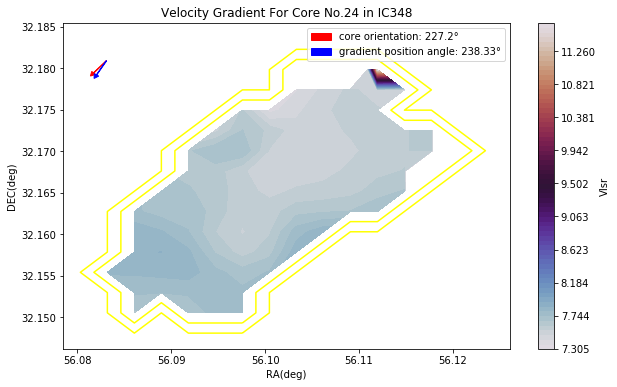

In [51]:
gradient_plot(d5,index5,data5,w5,orientation5,position_angle_d5,slope_x5,slope_y5,'IC348')


In [52]:
''''define function to compute the smallest angle between the core axes orientation and
the velocity gradient direction.'''
def difference_between_angles(index,d,position_angle,orientation):
    new_p=[]
    new_o=[]
    for k in index:
        structure = d[k]
        q = np.argwhere(index==k)[0][0]
        p_angle = position_angle[q]
        o_angle = orientation[q]
        diff = np.absolute(p_angle-o_angle)
        if diff<=90:
            p_angle = p_angle
        else:
            p_angle=p_angle+180 #for difference larger than 90deg,flip the position angle by 180deg
        new_p.append(p_angle)
        new_o.append(o_angle)
    difference = np.absolute(np.array(new_p)-np.array(new_o))
    new_diff = []
    for i in difference:
        if i>180:
            new_diff.append(360-i)
        else:
            new_diff.append(i)
    return np.array(new_diff)

In [53]:
diff_1 = difference_between_angles(index1,d1,position_angle_d1,orientation1)
diff_2 = difference_between_angles(index2,d2,position_angle_d2,orientation2)
diff_3 = difference_between_angles(index3,d3,position_angle_d3,orientation3)
diff_4 = difference_between_angles(index4,d4,position_angle_d4,orientation4)
diff_5 = difference_between_angles(index5,d5,position_angle_d5,orientation5)

# Checking for Protostars

In [54]:
with open('/home/student04/Newrepos/c2d_dunham_table2_edit.txt','r')as f:
    all_data = [line.strip()for line in f.readlines()]
perseus_data = all_data[2378:2763] #selecting sources from Perseus

In [55]:
#Identifying the equatorial coordinates of protostellar sources
RA = []
DEC = []
for i in perseus_data:
    info = i.split()
    ra = f'{info[2]}h{info[3]}m{info[4]}s'
    dec = f'{info[5]}d{info[6]}m{info[7]}s'
    RA.append(ra)
    DEC.append(dec)
ra_deg=[]
dec_deg=[]
for k in range(len(RA)):
    c = SkyCoord(RA[k],DEC[k],frame='icrs')
    ra = c.ra.value
    dec = c.dec.value
    ra_deg.append(ra)
    dec_deg.append(dec)

In [56]:
def check_protostars(index,d,data,w):
    protostellar = []
    for i in index:
        structure = d[i]
        mask = structure.get_mask()
        yy,xx=structure.indices()
        sy,sx = data.shape
        a = np.linspace(0,sx-1,sx)
        b = np.linspace(0,sy-1,sy)
        wxx,null = w.wcs_pix2world(a,1,1)
        null,wyy = w.wcs_pix2world(1,b,1)
        wx,wy = w.wcs_pix2world(xx,yy,1)
        xmin = np.min(wx)
        xmax = np.max(wx)
        ymin = np.min(wy)
        ymax = np.max(wy)
        protostellar_checker=[]
        for k in range(len(RA)):
            if xmin<=ra_deg[k]<=xmax and ymin<=dec_deg[k]<=ymax:
                ''''checks whether a protostar is within the boundary of a core'''
                protostellar_checker.append(False)
            else:
                protostellar_checker.append(True)
        if np.all(protostellar_checker)==False:
            protostellar.append(i)
    return protostellar

In [57]:
#list of protostellar cores
stars1 = check_protostars(index1,d1,data1,w1)
stars2 = check_protostars(index2,d2,data2,w2)
stars3 = check_protostars(index3,d3,data3,w3)
stars4 = check_protostars(index4,d4,data4,w4)
stars5 = check_protostars(index5,d5,data5,w5)

In [58]:
#returns actual indices of protostellar cores out of a list of all cores
def actual_index(stars,index):
    actual = []
    for i in stars:
        actual.append(np.where(index==i)[0][0])
    return actual

In [59]:
def starless(array,stars,index):
    starless_array = np.delete(array,actual_index(stars,index))
    return starless_array

In [60]:
def protostellar(array,stars,index):
    protostellar_array = np.take(array,actual_index(stars,index))
    return protostellar_array

# Cumulative Distribution Function

In [61]:
#defines a step function 
def step_function(diff):
    X = np.sort(diff)
    ecdf = sm.distributions.ECDF(X)
    Y = ecdf(X)
    x_values = [min(X),max(X)]
    y_values = [min(Y),max(Y)]
    plot(x_values,y_values,'r--')
    plt.step(X,Y)

In [62]:
''''Because the outflow of materials in protostellar cores may disrupt the gas, we need to separate
cores into two different types, starless and protostellar.'''
def separate_different_cores(diff,index,d,stars,position_angle,orientation,name):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    step_function(diff)
    plt.title('CDF of '+ name + ' : All Cores')
    if protostellar(index,stars,index).size != 0: #makes sure the code doesn't crash in case there aren't any protostellar cores
        plt.subplot(1,3,2)
        step_function(difference_between_angles(starless(index,stars,index),d,starless(position_angle,stars,index),starless(orientation,stars,index)))
        plt.title('CDF of '+ name + ' : Starless Cores')
        plt.subplot(1,3,3)
        step_function(difference_between_angles(protostellar(index,stars,index),d,protostellar(position_angle,stars,index),protostellar(orientation,stars,index)))
        plt.title('CDF of '+ name + ' : Protostellar Cores')  
    else:
        pass

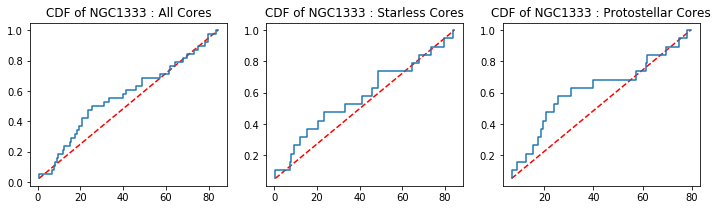

In [26]:
separate_different_cores(diff_1,index1,d1,stars1,position_angle_d1,orientation1,'NGC1333')

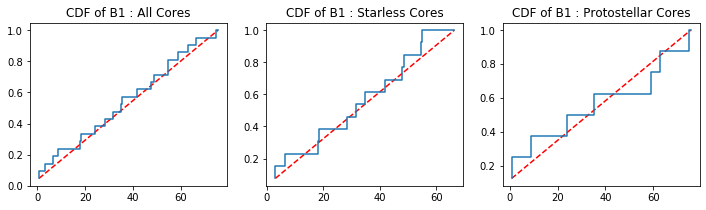

In [27]:
separate_different_cores(diff_2,index2,d2,stars2,position_angle_d2,orientation2,'B1')

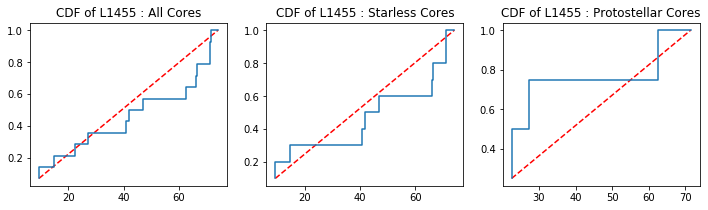

In [28]:
separate_different_cores(diff_3,index3,d3,stars3,position_angle_d3,orientation3,'L1455')

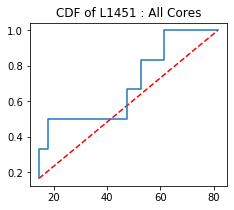

In [29]:
separate_different_cores(diff_4,index4,d4,stars4,position_angle_d4,orientation4,'L1451')

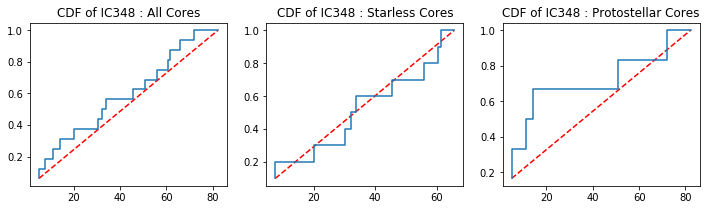

In [30]:
separate_different_cores(diff_5,index5,d5,stars5,position_angle_d5,orientation5,'IC348')

# Reduced Chi Square

In [64]:
def chisquare(index,d,data,error,w):
    chisq = []
    for k in index:
        structure = d[k]
        mask = structure.get_mask()
        y,x = structure.indices()
        vel = data[y,x]
        wx,wy = w.wcs_pix2world(x,y,1)
        model = models.Planar2D()
        fitter = fitting.LevMarLSQFitter()
        best_fit = fitter(model,wx,wy,vel)
        slope_x = (best_fit.slope_x.value)
        slope_y = (best_fit.slope_y.value)
        v0 = (best_fit.intercept.value)
        masked_data = np.ma.masked_where(mask==False,data)
        masked_error = np.ma.masked_where(mask==False,error)
        velocity = np.zeros_like(data)
        sy,sx = data.shape
        a = np.linspace(0,sx-1,sx)
        b = np.linspace(0,sy-1,sy)
        wxx,null = w.wcs_pix2world(a,1,1)
        null,wyy = w.wcs_pix2world(1,b,1)
        for i in range(sx):
            for j in range(sy):
                v = wxx[(i)]*slope_x + wyy[(j)]*slope_y + v0
                velocity[(j,i)]=v
        masked_v = np.ma.masked_where(mask==False,velocity)
        chi = np.zeros_like(masked_data)
        for i in x:
            for j in y:
                s = (masked_data[j,i]-masked_v[j,i])**2/((len(wx)-3)*(masked_error[j,i])**2)
                chi[(j,i)]=s
        chisq.append(np.sum(chi))
    return np.array(chisq)

In [65]:
chi1 = chisquare(index1,d1,data1,error1,w1)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [66]:
chi2 = chisquare(index2,d2,data2,error2,w2)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [67]:
chi3 = chisquare(index3,d3,data3,error3,w3)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [68]:
chi4 = chisquare(index4,d4,data4,error4,w4)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [69]:
chi5 = chisquare(index5,d5,data5,error5,w5)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
def Chi_Table(name,index,chi,stars):
    N = len(chi)
    dtype = [(name+': '+'Core Number','i4'),('Reduced Chi-Square','f4'),('Core Type','str')]
    t = Table(data=np.zeros(N,dtype=dtype))
    protostars_cores = actual_index(stars,index)
    for i in range(N):
        if i in protostars_cores:
            t[i]=[index[i],chi[i],'protostellar']
        else:
            t[i]=[index[i],chi[i],'starless']
    return t

In [91]:
def remove_inf(array,chi):
    new_array = np.delete(array,np.where(np.isinf(chi)))
    return new_array
    

In [92]:
def separate_chi(name,index,chi,stars):
    t1 = Chi_Table(name,remove_inf(index,chi),remove_inf(chi,chi),remove_inf(stars,chi))
    p = list(actual_index(remove_inf(stars,chi),remove_inf(index,chi)))
    s = np.where(np.isin(list(np.arange(0,len(remove_inf(index,chi)))),p)==False)[0]
    p_chi = np.take(remove_inf(chi,chi),p)
    s_chi = np.delete(remove_inf(chi,chi),p)
    print(t1[p],'mean for protostellar cores: ',np.mean(p_chi))
    print(t1[s],'mean for starless cores: ',np.mean(s_chi))


In [93]:
separate_chi('NGC1333',index1,chi1,stars1)

NGC1333: Core Number Reduced Chi-Square Core Type
-------------------- ------------------ ---------
                   3          137.92267         p
                   4          0.9766059         p
                  14           86.46658         p
                  31          261.43387         p
                  33          1043.7896         p
                  37          302.85547         p
                  39             148.12         p
                  40           5.332109         p
                  41          4.1345463         p
                  42          55.407738         p
                  46         12.6299095         p
                  49         102.902306         p
                  51          82.289444         p
                  52          2.3584492         p
                  62           47.39434         p
                  68            20.0923         p
                  70           98.72671         p mean for protostellar cores:  141.93132854615843
N

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.

In [94]:
separate_chi('B1',index2,chi2,stars2)

B1: Core Number Reduced Chi-Square Core Type
--------------- ------------------ ---------
              1           74.70109         p
             13          503.28427         p
             18          129.37054         p
             25          400.89038         p
             26          326.14893         p
             27           82.84469         p
             32          54.215847         p mean for protostellar cores:  224.4936806048568
B1: Core Number Reduced Chi-Square Core Type
--------------- ------------------ ---------
              8          132.62807         s
              9          39.714973         s
             11           63.59748         s
             12          4.1884103         s
             14          0.4336412         s
             16           43.94471         s
             17           4.441396         s
             20            8.35257         s
             22          11.096946         s
             33          3.2849722         s
       

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.

In [95]:
separate_chi('L1455',index3,chi3,stars3)

L1455: Core Number Reduced Chi-Square Core Type
------------------ ------------------ ---------
                 8           48.80156         p
                20          106.98667         p
                21          353.73627         p
                22          71.706215         p mean for protostellar cores:  145.3076754875388
L1455: Core Number Reduced Chi-Square Core Type
------------------ ------------------ ---------
                 0           81.21439         s
                 1           85.39263         s
                 7          23.628126         s
                 9           5.538385         s
                13           8.217166         s
                14           8.792484         s
                15           5.729385         s
                17          17.105013         s
                23          16.421064         s mean for starless cores:  28.004294514775317


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.

In [96]:
separate_chi('L1451',index4,chi4,stars4)

L1451: Core Number Reduced Chi-Square Core Type
------------------ ------------------ --------- mean for protostellar cores:  nan
L1451: Core Number Reduced Chi-Square Core Type
------------------ ------------------ ---------
                 2           4.912693         s
                 3          3.5591497         s
                 4           2.662859         s
                 6          15.027412         s
                 7          1.2836227         s mean for starless cores:  5.489147321713273


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.

In [97]:
separate_chi('IC348',index5,chi5,stars5)

IC348: Core Number Reduced Chi-Square Core Type
------------------ ------------------ ---------
                 3           529.1965         p
                 9           588.7153         p
                19          271.76285         p
                20          142.11465         p mean for protostellar cores:  382.94730437811995
IC348: Core Number Reduced Chi-Square Core Type
------------------ ------------------ ---------
                 4          13.683742         s
                 6          2.9716752         s
                11          15.804144         s
                13           6.311791         s
                16          3.1857908         s
                18          61.070942         s
                21          6.6485353         s
                23          2.3464422         s mean for starless cores:  14.00288273803286


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.7.3/lib/python3.7/site-packages/astropy/table/table.py:2600: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  cols[name][idx] = val
/opt/python/3.

In [98]:
def low_chi_cores(name,index,chi,stars):
    s = np.delete(np.arange(0,len(chi)),actual_index(stars,index))
    low_chi_indices = []
    low_chi_cores = []
    for i in s:
        if chi[i]<=7:
            low_chi_indices.append(i)
            low_chi_cores.append(index[i])
    return np.array(low_chi_indices),np.array(low_chi_cores)

In [99]:
low_chi_indices1,low_chi_cores1 = low_chi_cores('NGC1333',index1,chi1,stars1)

In [100]:
low_chi_indices2,low_chi_cores2 = low_chi_cores('B1',index2,chi2,stars2)

In [101]:
low_chi_indices4,low_chi_cores4 = low_chi_cores('L1451',index4,chi4,stars4)

In [102]:
low_chi_indices5,low_chi_cores5 = low_chi_cores('IC348',index5,chi5,stars5)

# Local Velocity Gradient

In [103]:
def sigmoid(x, x0, k):
    y = 1/ (1 + np.exp(-k*(x-x0)))
    return (y)

In [109]:
def gradient_per_pixel(k,index,d,data,w,name,orientation):
        structure = d[k]
        q = np.argwhere(index==k)[0][0]
        yy,xx = structure.indices()
        wx,wy = w.wcs_pix2world(xx,yy,1)
        mask = structure.get_mask()
        masked_data = np.ma.masked_where(mask==False,data)
        grad_orientation = []
        for i in xx:
            for j in yy:
                x = np.array([i-1,i-1,i-1,i,i,i,i+1,i+1,i+1])
                y = np.array([j-1,j,j+1,j-1,j,j+1,j-1,j,j+1])
                vel = masked_data[list(y),list(x)]
                model = models.Planar2D()
                fitter = fitting.LevMarLSQFitter()
                best_fit = fitter(model,x,y,vel)
                slope_x = (best_fit.slope_x.value)
                slope_y = (best_fit.slope_y.value)
                angle = ((np.arctan(slope_y/slope_x)*u.rad).to(u.deg))/(1*u.deg)
                #if angle>0:
                grad_orientation.append(angle)
                #else:
                    #grad_orientation.append(angle+180)
        g = np.array(grad_orientation)  
        grad_eachpixel = np.sort(np.ma.masked_where(np.isnan(g)==True,g))
        X = grad_eachpixel
        ecdf = sm.distributions.ECDF(X)
        Y = ecdf(X)
        new_g = np.sort(g)
        p0=[np.nanmean(X),1]
        XX = np.delete(new_g,np.where(np.isnan(new_g)==True))
        popt,pcov = opt.curve_fit(sigmoid,XX,ecdf(XX),p0,method='dogbox')
        YY = sigmoid(XX,*popt)
        x_values = [min(X),max(X)]
        y_values = [min(Y),max(Y)]
        plt.figure()
        #plt.axvline(orientation[q])
        plt.axvline(np.nanmedian(XX),color='black',linestyle='--')
        plt.step(X,Y,'g')
        plt.plot(XX,YY,'r')
        plt.title('CDF of Gradient per Pixel for Core No.'+str(k)+' of '+ name)
        plt.legend()

In [105]:
def new_orientation(orientation):
    o = []
    for i in orientation:
        if -90<i<90:
            o.append(-i)
        elif 90<i<270:
            o.append(180-i)
    return np.array(o)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launc

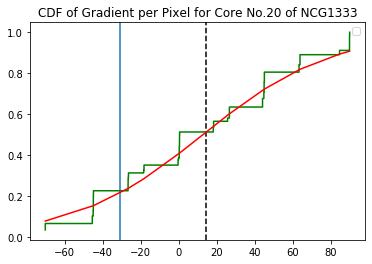

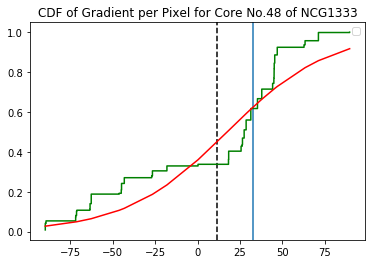

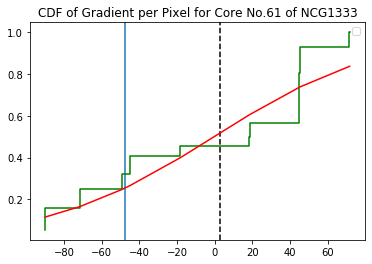

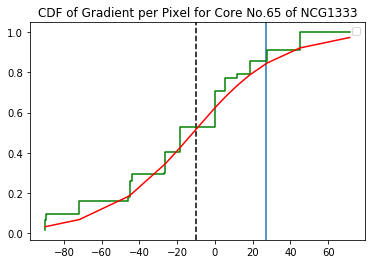

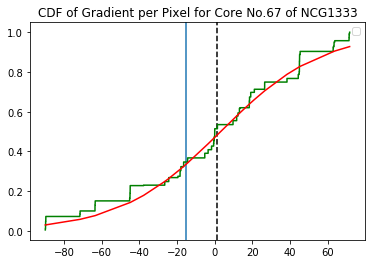

In [266]:
for k in low_chi_cores1:
    gradient_per_pixel(k,index1,d1,data1,w1,'NCG1333',new_orientation(orientation1))

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: Runtime

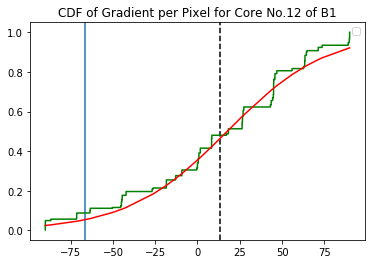

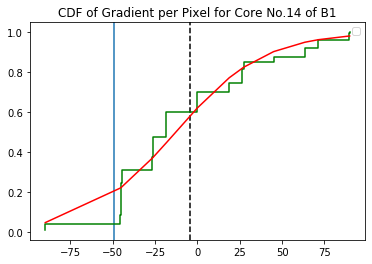

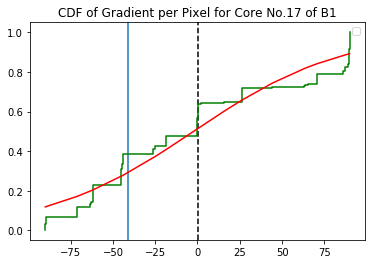

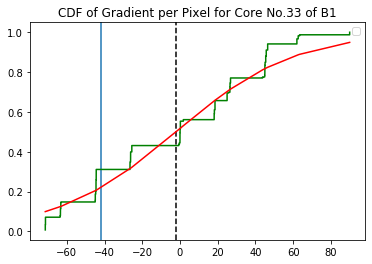

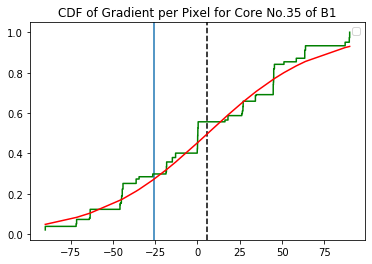

In [49]:
for k in low_chi_cores2:
    gradient_per_pixel(k,index2,d2,data2,w2,'B1',new_orientation(orientation2))

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.


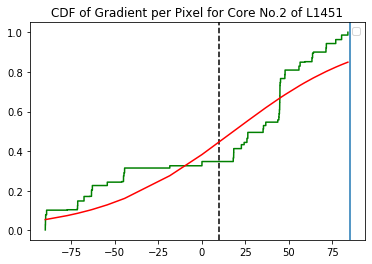

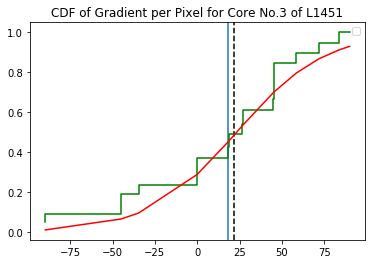

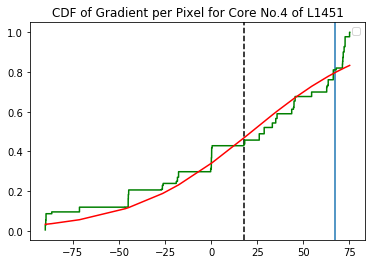

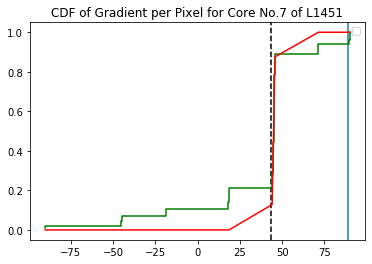

In [50]:
for k in low_chi_cores4:
    gradient_per_pixel(k,index4,d4,data4,w4,'L1451',new_orientation(orientation4))

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


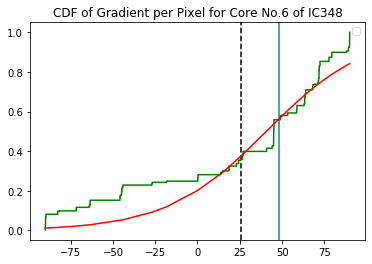

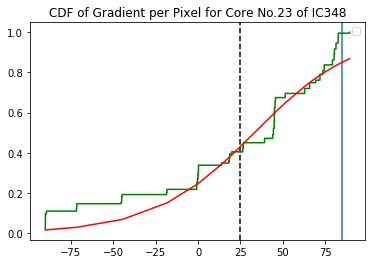

In [51]:
for k in low_chi_cores5:
    gradient_per_pixel(k,index5,d5,data5,w5,'IC348',new_orientation(orientation5))

# Monte Carlo Uncertainty Analysis

In [150]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 215 kB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/python/3.7.3/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [106]:
import seaborn as sns
from scipy.stats import norm

In [107]:
def Monte_Carlo(k,d,data,error,w):
    np.random.seed(4)
    structure = d[k]
    mask = structure.get_mask()
    y,x = structure.indices()
    wx,wy = w.wcs_pix2world(x,y,1)
    o_list=[]
    for k in range(100):
        masked_data = np.ma.masked_where(mask==False,data1)
        for i in x:
            for j in y:
                new_vel = np.random.normal(loc = data[j,i],scale=error[j,i])
                masked_data[(j,i)]=new_vel  
        vel = masked_data[y,x]
        model = models.Planar2D()
        fitter = fitting.LevMarLSQFitter()
        best_fit = fitter(model,wx,wy,vel)
        slope_x = (best_fit.slope_x.value)
        slope_y = (best_fit.slope_y.value)
        angle = ((np.arctan(slope_y/slope_x)*u.rad).to(u.deg))/(1*u.deg)
        o_list.append(angle) 
    new_list = new_orientation(np.array(o_list))
    mu,sigma = np.mean(new_list),np.std(new_list)
    return mu,sigma
#plt.hist(new_list,bins=15,normed=True,alpha=0.7)
#x = np.linspace(min(new_list),max(new_list),100)
#p = norm.pdf(x, mu, sigma)
#plt.plot(x, p, 'k', linewidth=1)
#plt.axvline(x=mu,color='w',linestyle='--')

In [80]:
def new_index(d,index):
    new_i = []
    for k in index:
        structure = d[k]
        mask = structure.get_mask()
        y,x = structure.indices()
        if len(y)>50:
            pass
        else:
            new_i.append(k)
    return np.array(new_i)

In [81]:
new_index1 =new_index(d1,index1)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.


2


No handles with labels found to put in legend.


4


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.


5


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


15


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


20


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


28


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


35


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.


37


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


38


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


40


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


41


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


44


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


46


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


48


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


51


No handles with labels found to put in legend.


58


No handles with labels found to put in legend.


61


/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


65


No handles with labels found to put in legend.


66


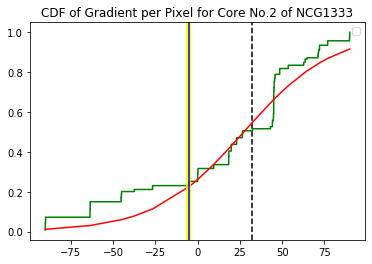

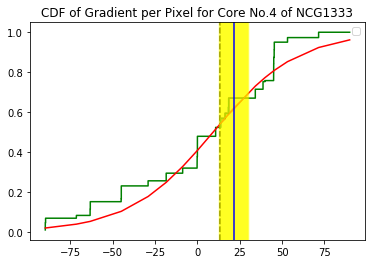

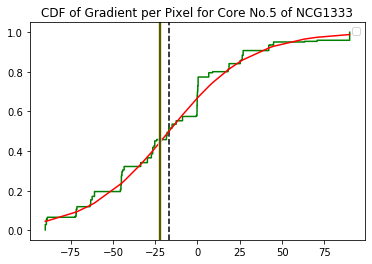

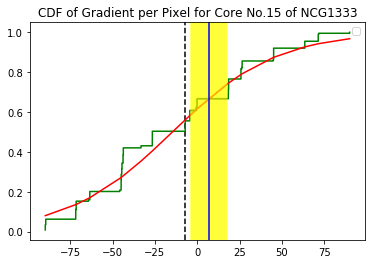

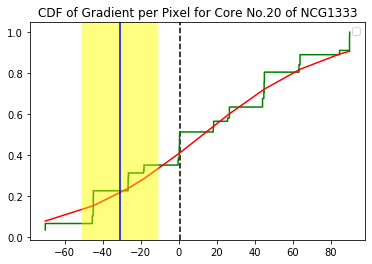

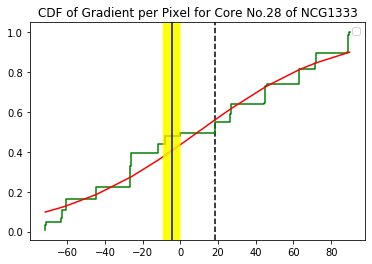

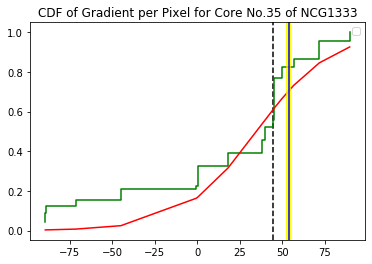

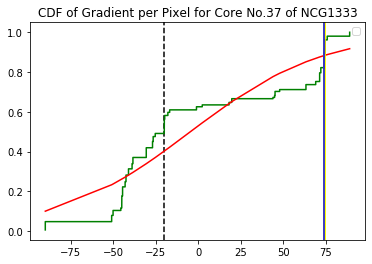

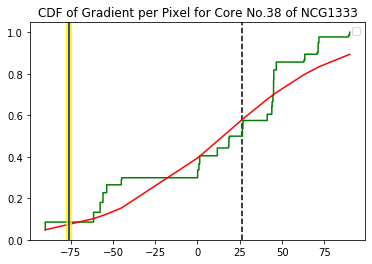

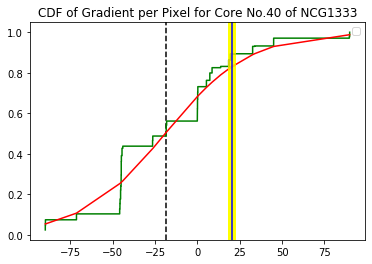

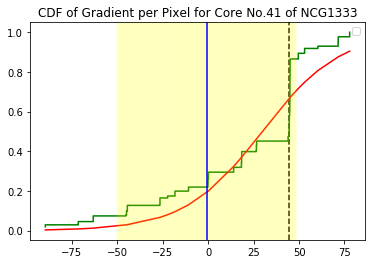

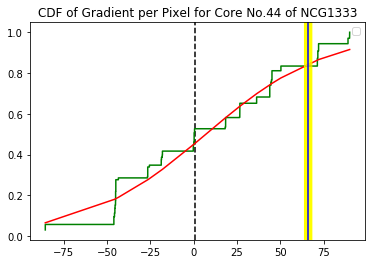

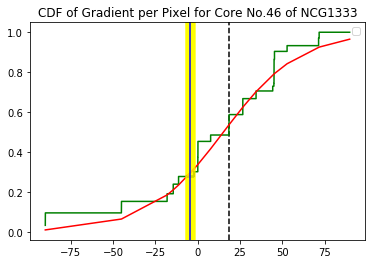

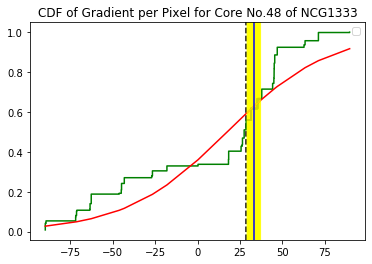

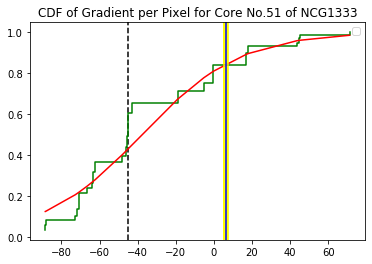

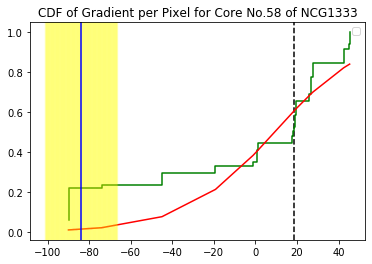

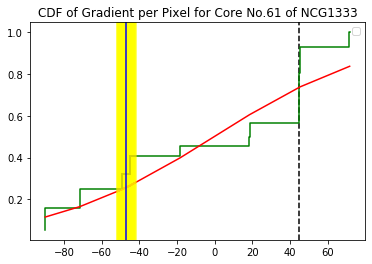

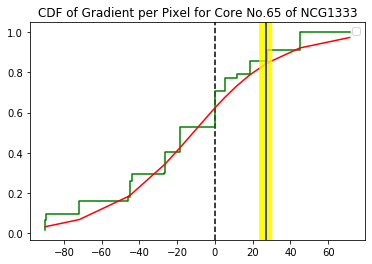

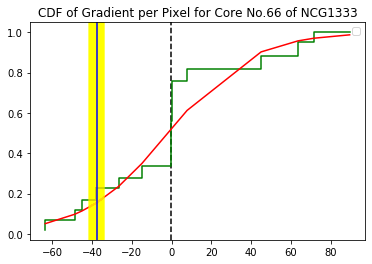

In [87]:
for k in new_index1:
    mu,sigma=Monte_Carlo(k,d1,data1,error1,w1)
    gradient_per_pixel(k,index1,d1,data1,w1,'NCG1333',new_orientation(orientation1))
    s = np.linspace(mu-sigma,mu+sigma,1000)
    for i in s:
        plt.axvline(x=i,color='yellow',alpha=0.03)
    plt.axvline(x=mu,color='b')
    print(k)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


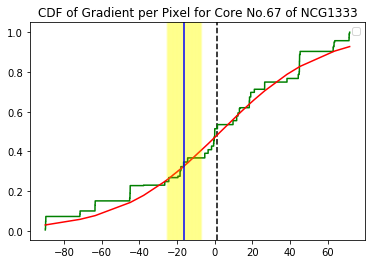

In [110]:
mu,sigma = Monte_Carlo(67,d1,data1,error1,w1)
gradient_per_pixel(67,index1,d1,data1,w1,'NCG1333',new_orientation(orientation1))
s = np.linspace(mu-3*sigma,mu+3*sigma,1000)
for i in s:
    plt.axvline(x=i,color='yellow',alpha=0.01)
plt.axvline(x=mu,color='b')